# UNDERSTANDING

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
df = pd.read_csv('tubesdatmin.csv')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [202]:
print("Shape of dataset:", df.shape)

df.info()

Shape of dataset: (11162, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [203]:
print(df.describe(include='all'))

                 age         job  marital  education default       balance  \
count   11162.000000       11162    11162      11162   11162  11162.000000   
unique           NaN          12        3          4       2           NaN   
top              NaN  management  married  secondary      no           NaN   
freq             NaN        2566     6351       5476   10994           NaN   
mean       41.231948         NaN      NaN        NaN     NaN   1528.538524   
std        11.913369         NaN      NaN        NaN     NaN   3225.413326   
min        18.000000         NaN      NaN        NaN     NaN  -6847.000000   
25%        32.000000         NaN      NaN        NaN     NaN    122.000000   
50%        39.000000         NaN      NaN        NaN     NaN    550.000000   
75%        49.000000         NaN      NaN        NaN     NaN   1708.000000   
max        95.000000         NaN      NaN        NaN     NaN  81204.000000   

       housing   loan   contact           day  month      durat

In [204]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

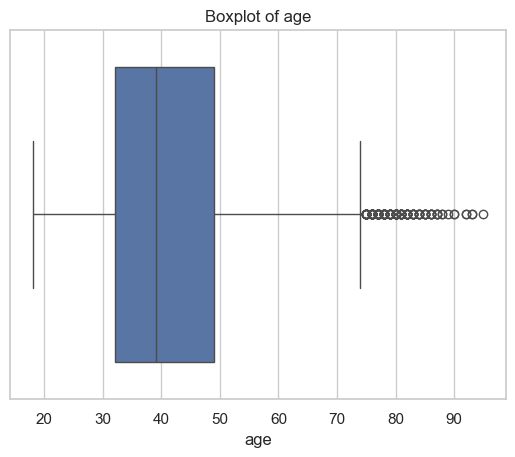

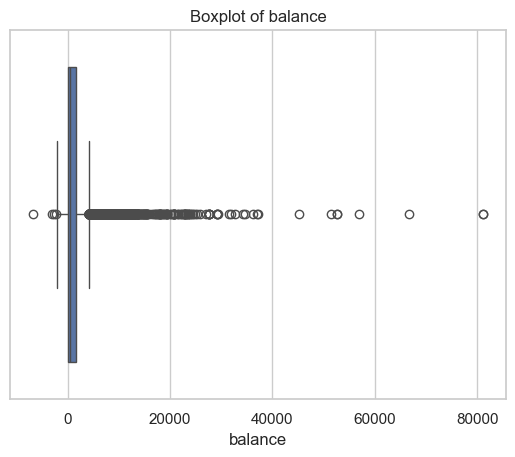

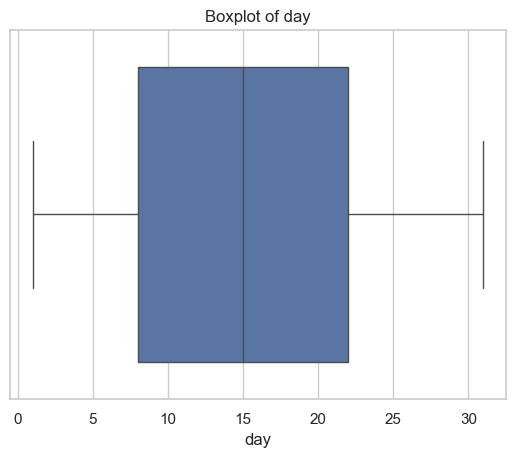

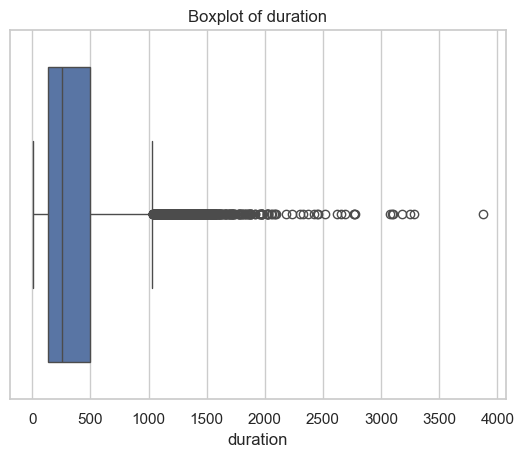

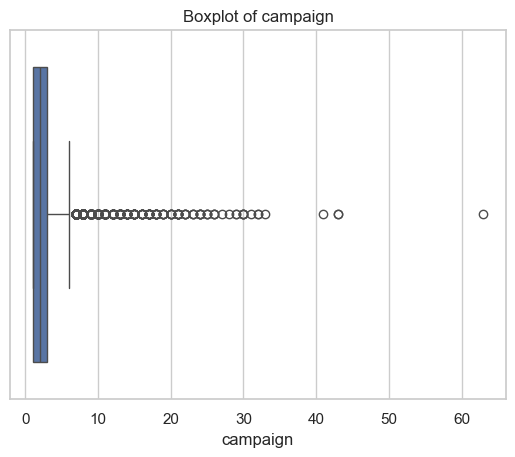

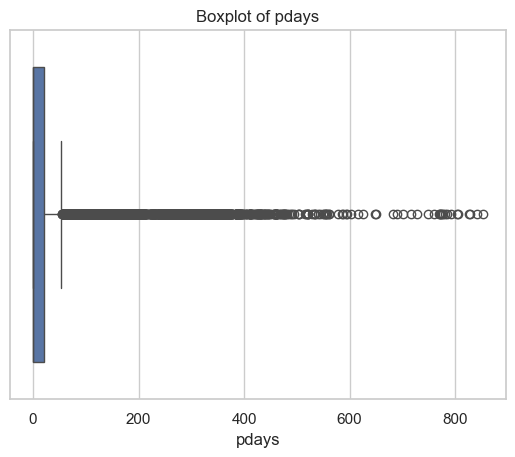

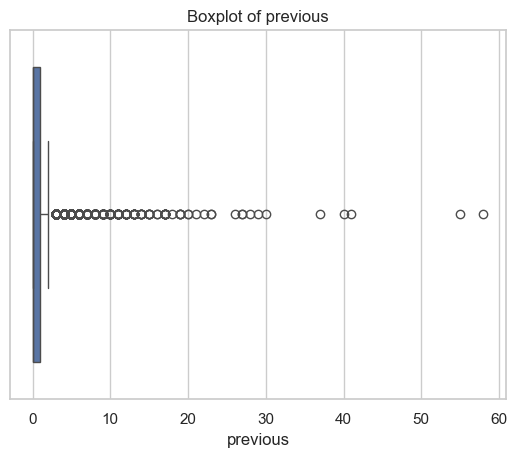

In [205]:
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

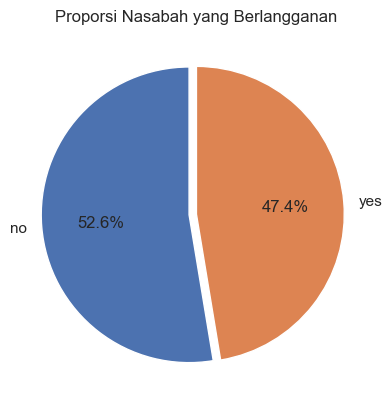

In [206]:
df['deposit'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0.05, 0))
plt.title('Proporsi Nasabah yang Berlangganan')
plt.ylabel('')
plt.show()

In [207]:
# IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f'{col}: {len(outliers)} outliers')

age: 171 outliers
balance: 1055 outliers
day: 0 outliers
duration: 636 outliers
campaign: 601 outliers
pdays: 2750 outliers
previous: 1258 outliers


In [208]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


job value counts:
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

marital value counts:
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

education value counts:
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

default value counts:
default
no     10994
yes      168
Name: count, dtype: int64

housing value counts:
housing
no     5881
yes    5281
Name: count, dtype: int64

loan value counts:
loan
no     9702
yes    1460
Name: count, dtype: int64

contact value counts:
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

month value counts:
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     9

In [209]:
print(df['poutcome'].value_counts())

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64



Membuat visualisasi untuk fitur numerik...


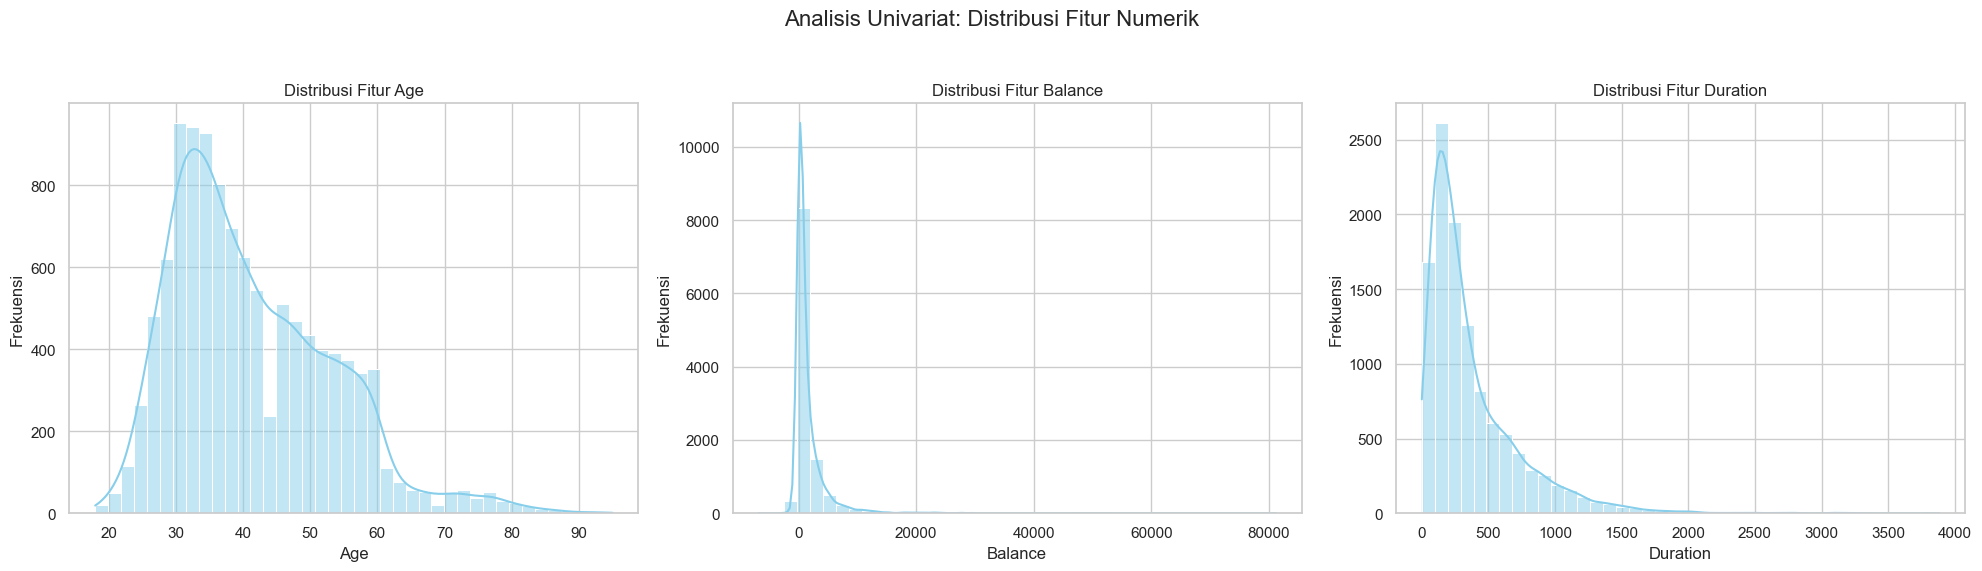

In [210]:
print("\nMembuat visualisasi untuk fitur numerik...")
numerical_features = ['age', 'balance', 'duration']

# Membuat plot Histogram dan KDE
plt.figure(figsize=(20, 6))
plt.suptitle('Analisis Univariat: Distribusi Fitur Numerik', fontsize=16)
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=40, color='skyblue')
    plt.title(f'Distribusi Fitur {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frekuensi')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

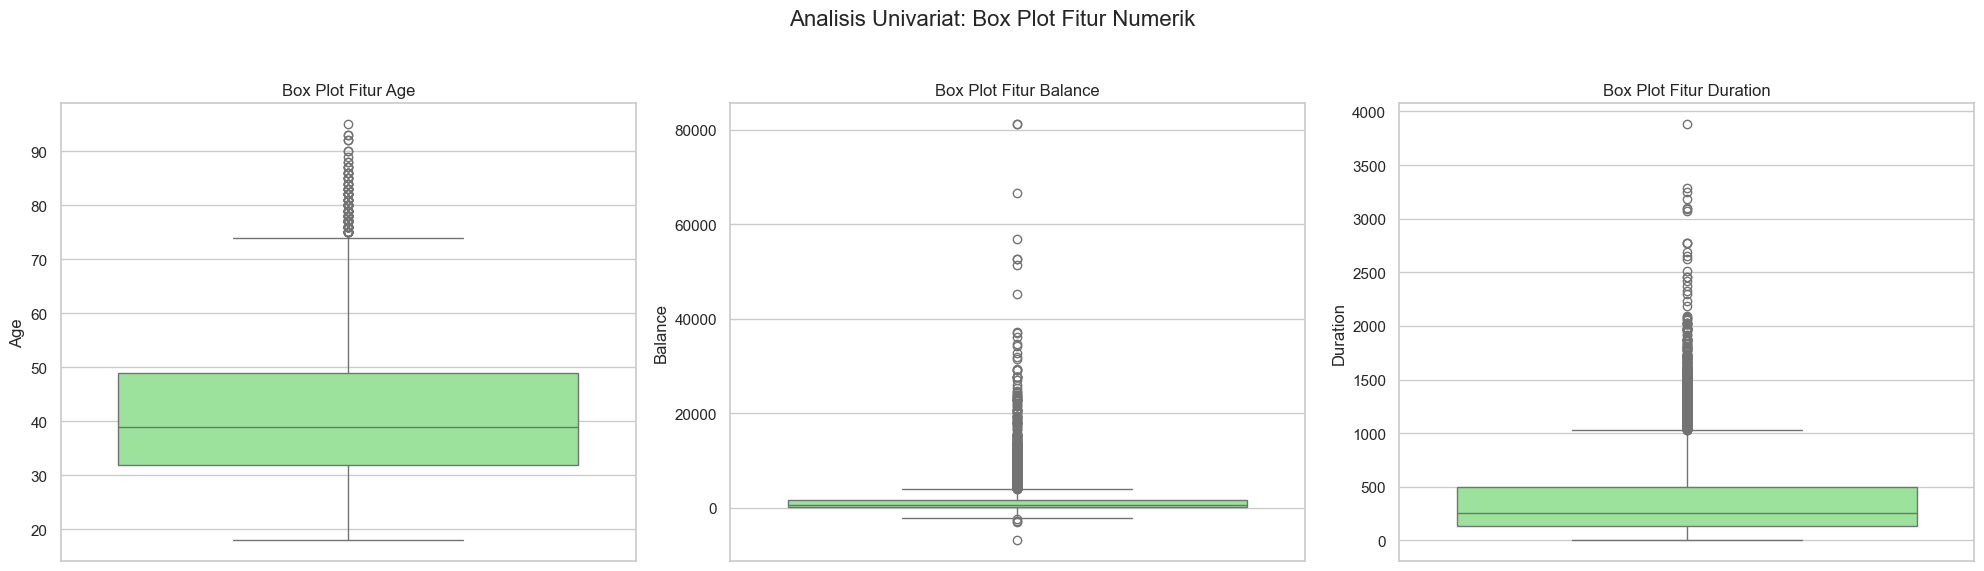

In [211]:
plt.figure(figsize=(20, 6))
plt.suptitle('Analisis Univariat: Box Plot Fitur Numerik', fontsize=16)
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Box Plot Fitur {col.capitalize()}')
    plt.ylabel(col.capitalize())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\Salma Afidah\AppData\Local\Temp\ipykernel_5108\3380890481.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_10_jobs, palette='viridis')
C:\Users\Salma Afidah\AppData\Local\Temp\ipykernel_5108\3380890481.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order = df[col].value_counts().index, palette='viridis')
C:\Users\Salma Afidah\AppData\Local\Temp\ipykernel_5108\3380890481.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order = df[col].value_counts().index, palette='viridi

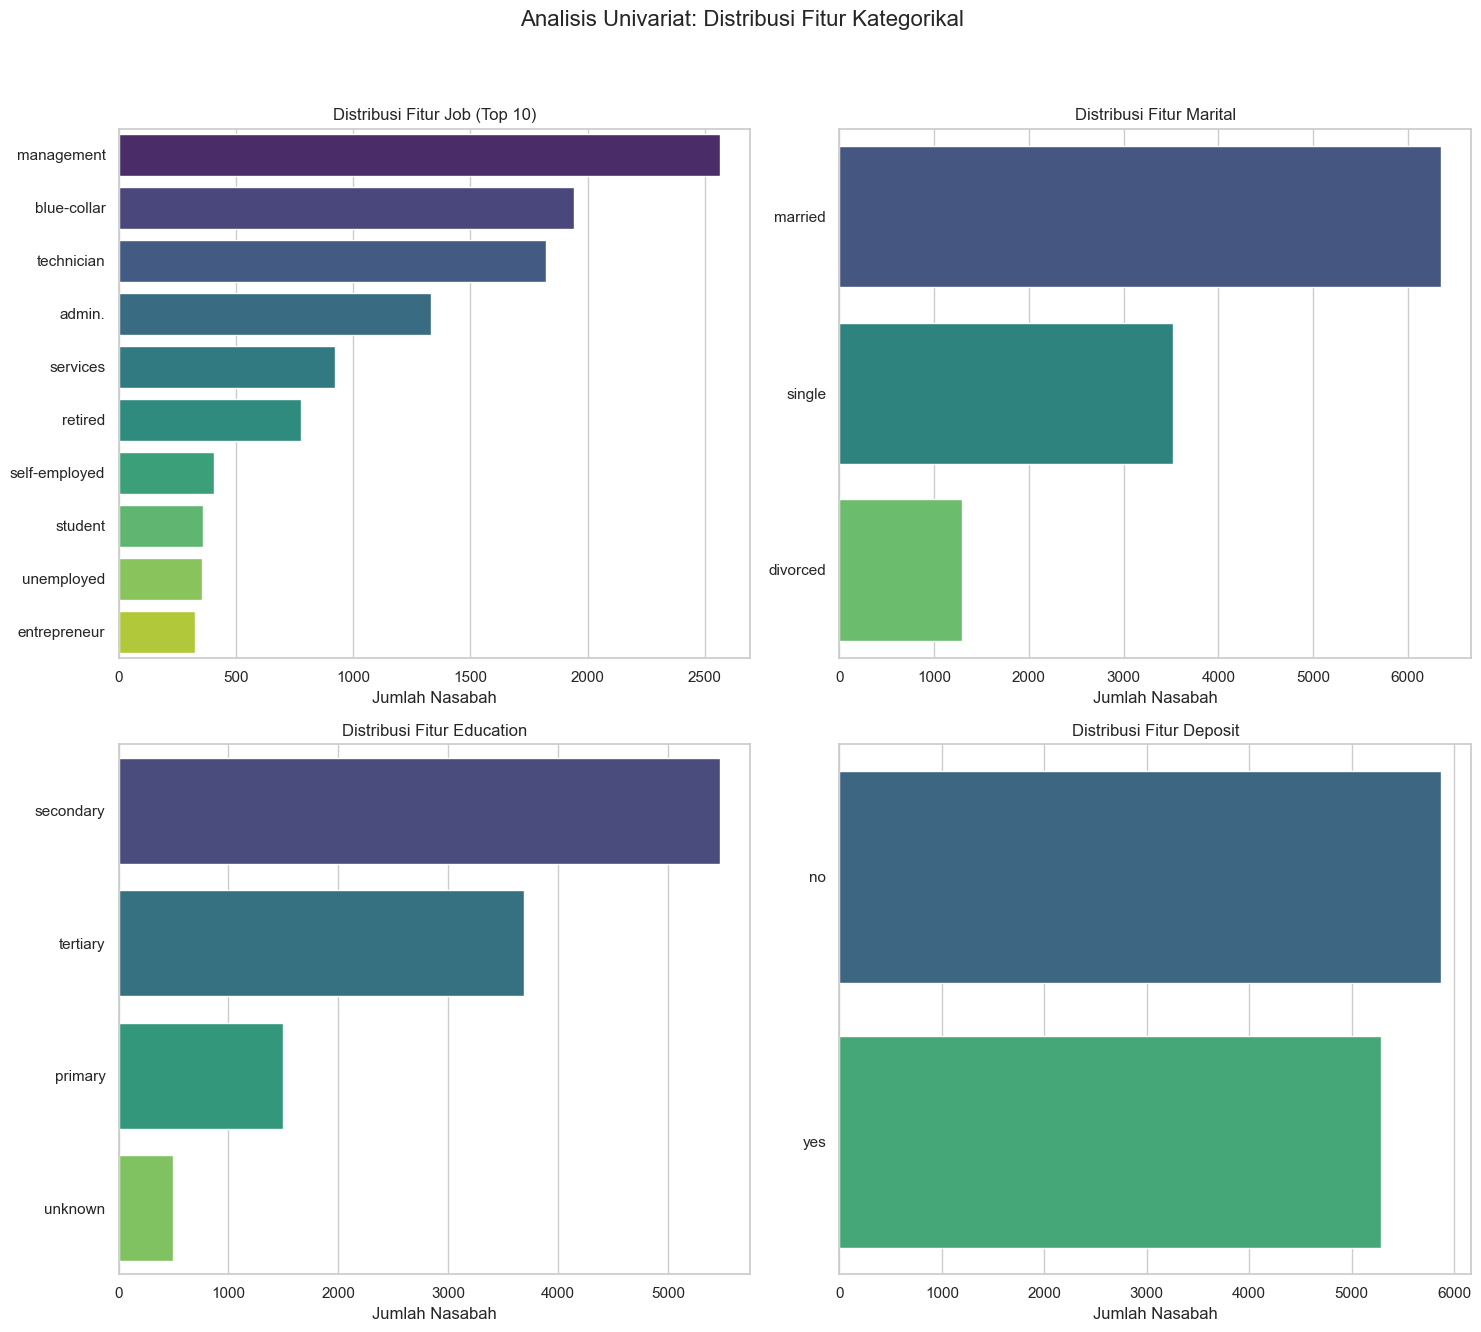

In [212]:
categorical_features = ['job', 'marital', 'education', 'deposit']

plt.figure(figsize=(15, 14))
plt.suptitle('Analisis Univariat: Distribusi Fitur Kategorikal', fontsize=16)
for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    # Tampilkan 10 kategori teratas untuk 'job' agar tidak terlalu ramai
    if col == 'job':
        top_10_jobs = df[col].value_counts().nlargest(10).index
        sns.countplot(y=df[col], order=top_10_jobs, palette='viridis')
        plt.title(f'Distribusi Fitur {col.capitalize()} (Top 10)')
    else:
        sns.countplot(y=df[col], order = df[col].value_counts().index, palette='viridis')
        plt.title(f'Distribusi Fitur {col.capitalize()}')
    plt.xlabel('Jumlah Nasabah')
    plt.ylabel('') # Hapus label y untuk kerapian
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\Salma Afidah\AppData\Local\Temp\ipykernel_5108\2517735243.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='deposit', y=col, data=df, palette='pastel')
C:\Users\Salma Afidah\AppData\Local\Temp\ipykernel_5108\2517735243.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='deposit', y=col, data=df, palette='pastel')
C:\Users\Salma Afidah\AppData\Local\Temp\ipykernel_5108\2517735243.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='deposit', y=col, data=df, palette='pastel')


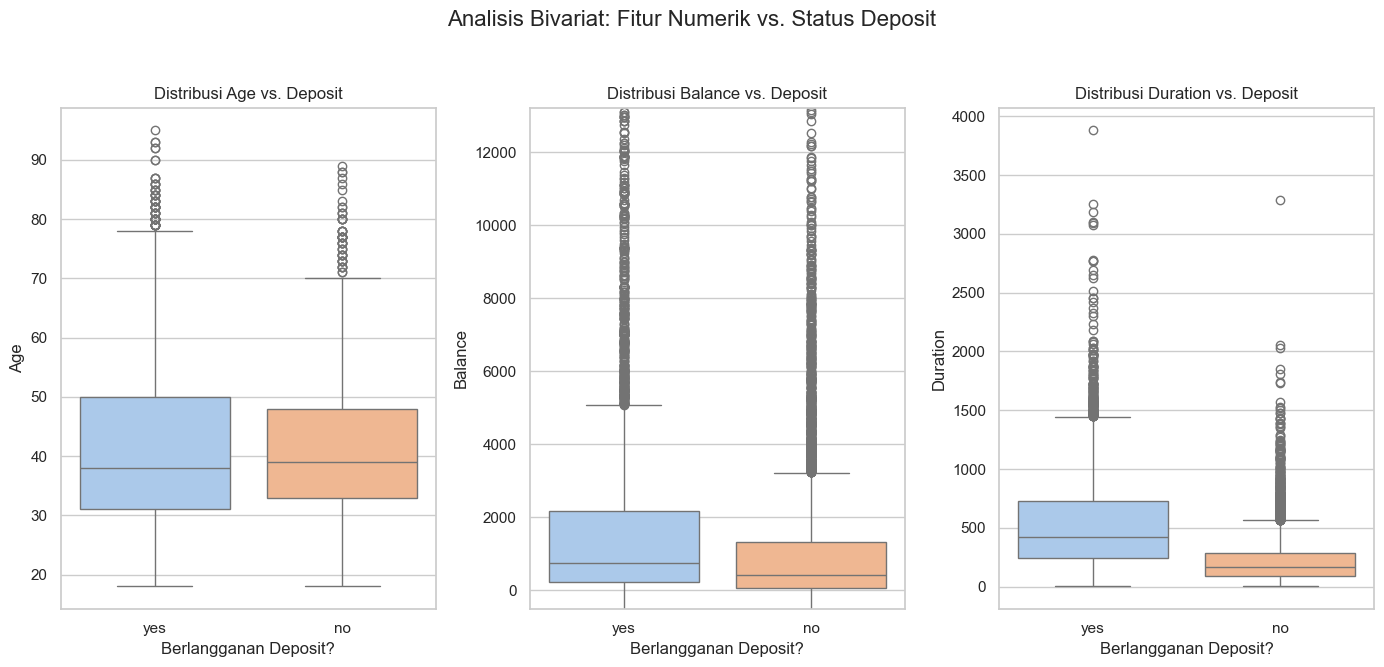

In [213]:
# A. Hubungan Fitur Numerik dengan Target
plt.figure(figsize=(14, 7))
plt.suptitle('Analisis Bivariat: Fitur Numerik vs. Status Deposit', fontsize=16)
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='deposit', y=col, data=df, palette='pastel')
    plt.title(f'Distribusi {col.capitalize()} vs. Deposit')
    plt.xlabel('Berlangganan Deposit?')
    plt.ylabel(col.capitalize())
    # Batasi sumbu y untuk balance agar lebih mudah dibaca jika perlu
    if col == 'balance':
        plt.ylim(df['balance'].quantile(0.01), df['balance'].quantile(0.99))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



Membuat visualisasi hubungan fitur kategorikal dengan target...


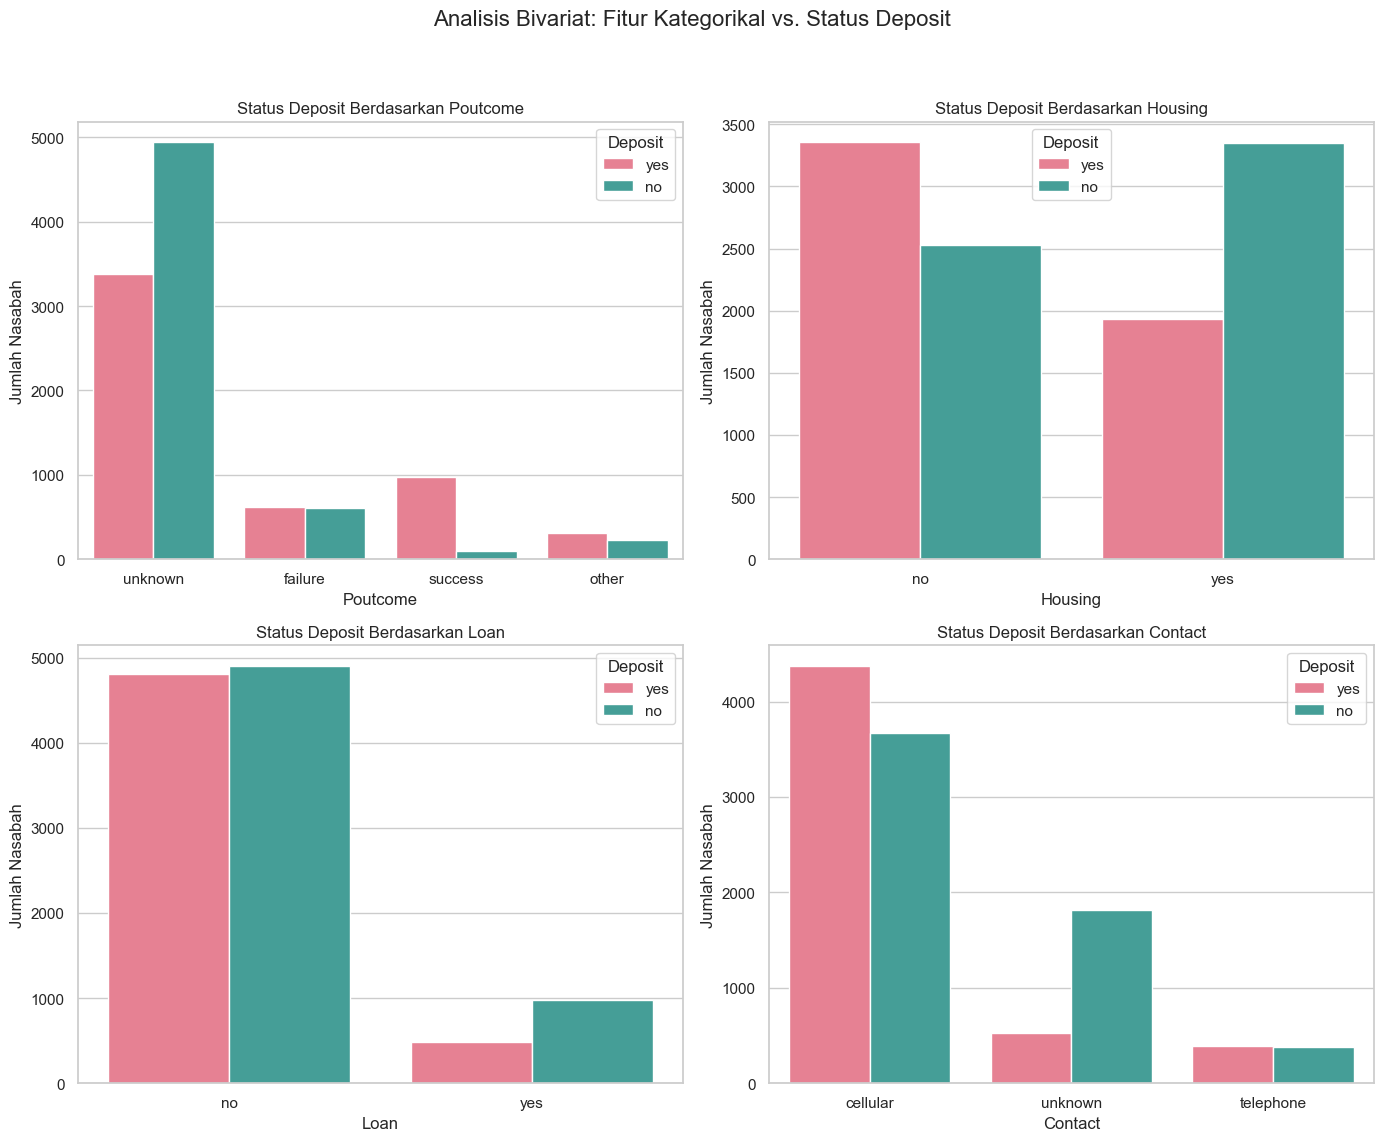

In [214]:
# B. Hubungan Fitur Kategorikal dengan Target
print("\nMembuat visualisasi hubungan fitur kategorikal dengan target...")
# Fokus pada beberapa fitur kategorikal yang menarik
bivariate_categorical = ['poutcome', 'housing', 'loan', 'contact']
plt.figure(figsize=(14, 12))
plt.suptitle('Analisis Bivariat: Fitur Kategorikal vs. Status Deposit', fontsize=16)
for i, col in enumerate(bivariate_categorical):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, hue='deposit', data=df, palette='husl', order = df[col].value_counts().index)
    plt.title(f'Status Deposit Berdasarkan {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Jumlah Nasabah')
    plt.legend(title='Deposit')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


--- Memulai Analisis Multivariat (Heatmap Korelasi) ---


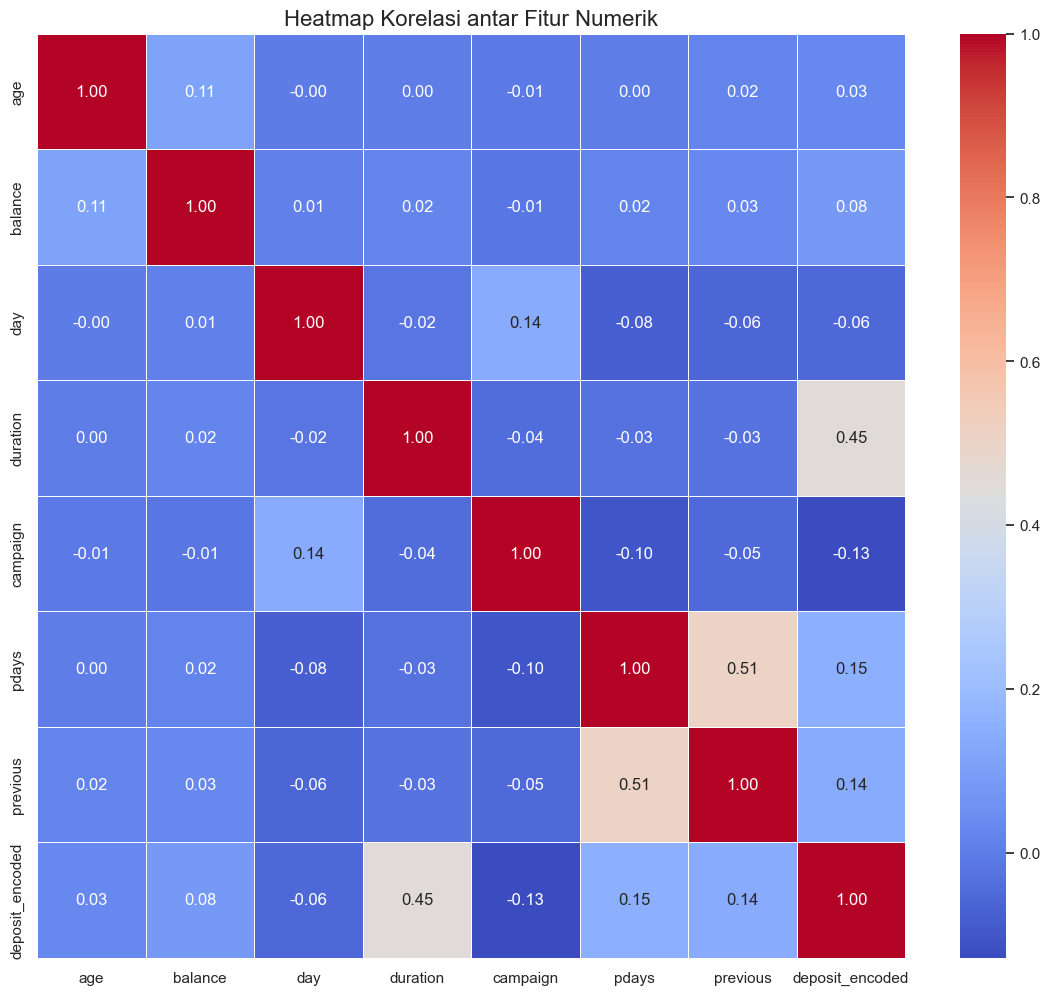

In [215]:
print("\n--- Memulai Analisis Multivariat (Heatmap Korelasi) ---")

# Buat kolom target numerik untuk korelasi
df_corr = df.copy()
if 'deposit' in df_corr.columns:
    df_corr['deposit_encoded'] = df_corr['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

# Pilih hanya kolom numerik termasuk target yang sudah di-encode
df_numeric = df_corr.select_dtypes(include=np.number)

plt.figure(figsize=(14, 12))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi antar Fitur Numerik', fontsize=16)
plt.show()

# PREPARATION

In [216]:
df['deposit_encoded'] = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

In [217]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit_encoded
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,1


# Outlier Handling

In [218]:
print("DataFrame shape before outlier handling:", df.shape)

# Daftar kolom numerik yang akan dicek outlier-nya
numerical_cols_for_outlier = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'deposit_encoded']

def cap_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Simpan nilai sebelum capping untuk perbandingan
    original_min = dataframe[column].min()
    original_max = dataframe[column].max()

    # Lakukan capping
    dataframe[column] = np.where(dataframe[column] < lower_bound, lower_bound, dataframe[column])
    dataframe[column] = np.where(dataframe[column] > upper_bound, upper_bound, dataframe[column])

    # Cek apakah ada perubahan
    capped_min = dataframe[column].min()
    capped_max = dataframe[column].max()

    print(f"Outlier capping for column: {column}")
    if original_min < lower_bound or original_max > upper_bound:
        print(f"  Original Min: {original_min:.2f}, Original Max: {original_max:.2f}")
        print(f"  IQR Lower Bound: {lower_bound:.2f}, IQR Upper Bound: {upper_bound:.2f}")
        print(f"  Capped Min: {capped_min:.2f}, Capped Max: {capped_max:.2f}")
    else:
        print(f"  No outliers found or capped based on 1.5*IQR rule.")
    return dataframe

DataFrame shape before outlier handling: (11162, 18)


In [219]:
for col in numerical_cols_for_outlier:
    if col in df.columns:
        df = cap_outliers_iqr(df.copy(), col) # Gunakan .copy() untuk menghindari SettingWithCopyWarning
                                          # dan memastikan operasi dilakukan pada salinan yang kemudian diassign kembali ke df
    else:
        print(f"Column '{col}' not found in dataframe.")


Outlier capping for column: age
  Original Min: 18.00, Original Max: 95.00
  IQR Lower Bound: 6.50, IQR Upper Bound: 74.50
  Capped Min: 18.00, Capped Max: 74.50
Outlier capping for column: balance
  Original Min: -6847.00, Original Max: 81204.00
  IQR Lower Bound: -2257.00, IQR Upper Bound: 4087.00
  Capped Min: -2257.00, Capped Max: 4087.00
Outlier capping for column: duration
  Original Min: 2.00, Original Max: 3881.00
  IQR Lower Bound: -399.00, IQR Upper Bound: 1033.00
  Capped Min: 2.00, Capped Max: 1033.00
Outlier capping for column: campaign
  Original Min: 1.00, Original Max: 63.00
  IQR Lower Bound: -2.00, IQR Upper Bound: 6.00
  Capped Min: 1.00, Capped Max: 6.00
Outlier capping for column: pdays
  Original Min: -1.00, Original Max: 854.00
  IQR Lower Bound: -33.62, IQR Upper Bound: 53.38
  Capped Min: -1.00, Capped Max: 53.38
Outlier capping for column: previous
  Original Min: 0.00, Original Max: 58.00
  IQR Lower Bound: -1.50, IQR Upper Bound: 2.50
  Capped Min: 0.00, Cap

In [220]:
# IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f'{col}: {len(outliers)} outliers')

age: 0 outliers
balance: 0 outliers
day: 0 outliers
duration: 0 outliers
campaign: 0 outliers
pdays: 0 outliers
previous: 0 outliers


# Imputasi Unknown

In [221]:
print("\nValue counts untuk 'job' SEBELUM imputasi 'unknown':")
print(df['job'].value_counts(dropna=False)) # dropna=False untuk melihat NaN jika ada (seharusnya tidak ada)


Value counts untuk 'job' SEBELUM imputasi 'unknown':
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64


In [222]:
job_mode = df['job'].mode()[0]
print(f"Modus untuk kolom 'job' (termasuk 'unknown' jika itu modus): '{job_mode}'")

Modus untuk kolom 'job' (termasuk 'unknown' jika itu modus): 'management'


In [223]:
df['job'].replace('unknown', job_mode, inplace=True)
print(f"\nNilai 'unknown' pada kolom 'job' telah diimputasi dengan '{job_mode}'.")


Nilai 'unknown' pada kolom 'job' telah diimputasi dengan 'management'.


C:\Users\Salma Afidah\AppData\Local\Temp\ipykernel_5108\1078600962.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job'].replace('unknown', job_mode, inplace=True)


In [224]:
print("\nValue counts untuk 'job' SETELAH imputasi 'unknown':")
print(df['job'].value_counts(dropna=False))
if 'unknown' in df['job'].unique():
  print("Peringatan: Masih ada 'unknown' di kolom 'job'. Periksa logika imputasi.")
else:
  print("Tidak ada lagi nilai 'unknown' di kolom 'job'.")
  print(f"\nShape df_processed setelah menangani 'unknown' di 'job': {df.shape}")


Value counts untuk 'job' SETELAH imputasi 'unknown':
job
management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: count, dtype: int64
Tidak ada lagi nilai 'unknown' di kolom 'job'.

Shape df_processed setelah menangani 'unknown' di 'job': (11162, 18)


# Binning balance

In [225]:
#print(df['balance'].describe())

In [226]:
#print(df['balance'].quantile([0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]))

In [227]:
#bins = [-np.inf, -0.00001, 550, 1708, np.inf]
#labels = ['Negative', 'Low', 'Medium', 'High']
#df['balance_status'] = pd.cut(df['balance'], bins=bins, labels=labels, right=True)
#print("Distribusi kategori 'balance_status':")
#print(df['balance_status'].value_counts())

In [228]:
#df.drop('balance', axis=1, inplace=True)
#print("\nKolom 'balance' numerik asli telah dihapus.")

In [229]:
#print(f"\nShape df_processed setelah binning 'balance' dan penghapusan kolom asli: {df.shape}")
#print("Contoh beberapa baris dengan kolom 'balance_status':")
#print(df[['age', 'job', 'balance_status', 'deposit_encoded']].head())

# Eksperimen

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

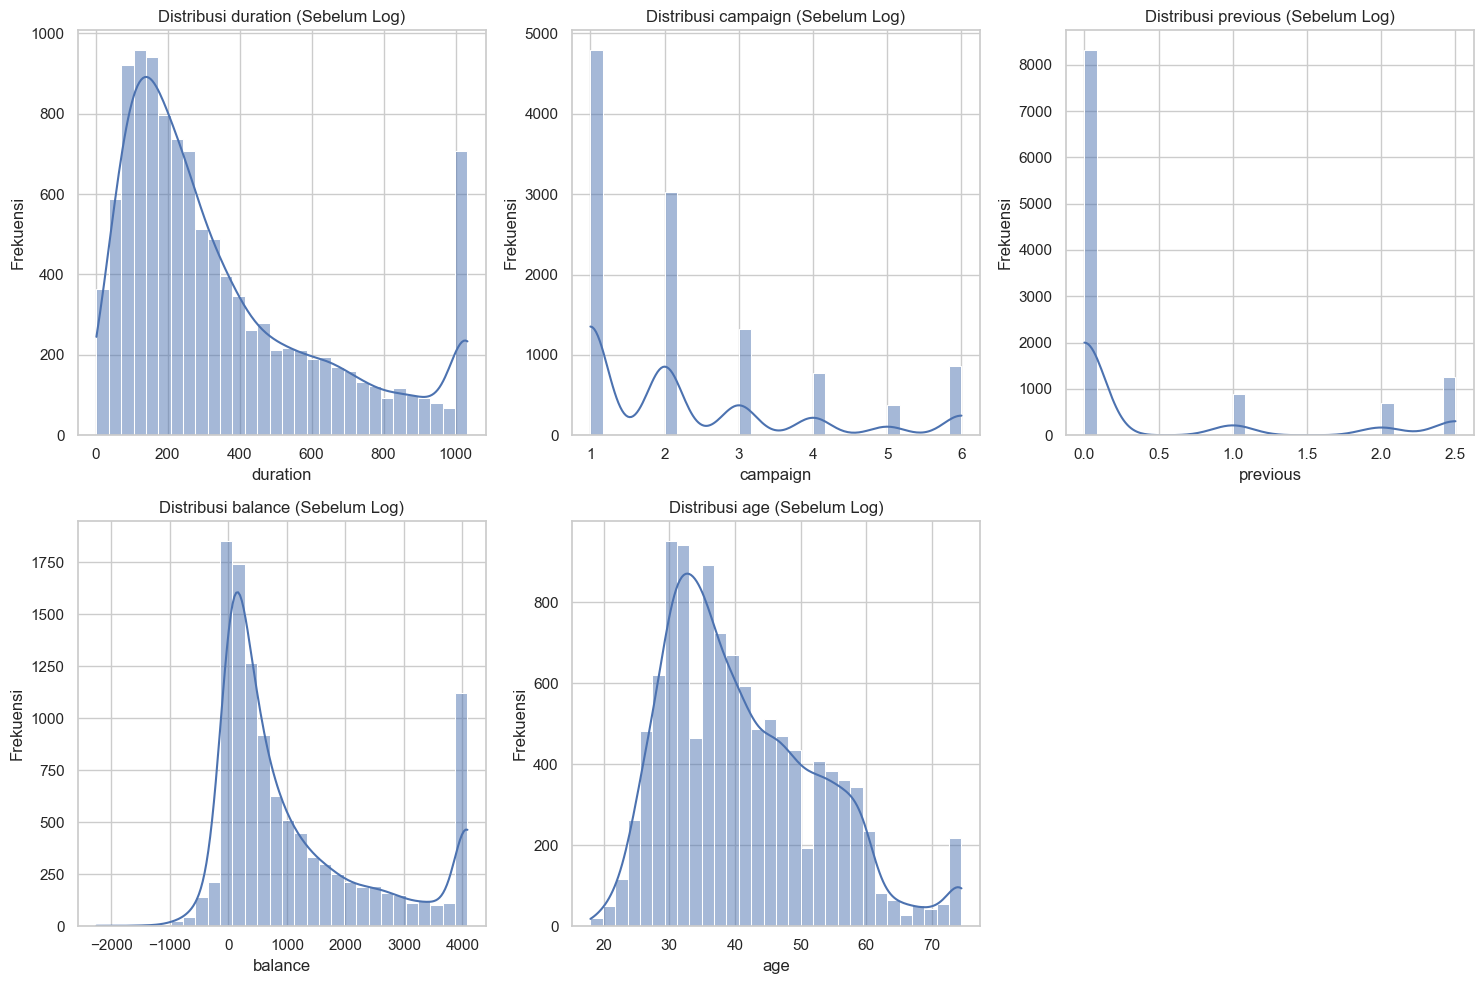


Statistik deskriptif untuk fitur yang divisualisasikan (Sebelum Log):
           duration      campaign      previous       balance           age
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000
mean     352.948486      2.238577      0.485397   1117.352804     41.152347
std      284.714889      1.521158      0.892563   1349.670734     11.659113
min        2.000000      1.000000      0.000000  -2257.000000     18.000000
25%      138.000000      1.000000      0.000000    122.000000     32.000000
50%      255.000000      2.000000      0.000000    550.000000     39.000000
75%      496.000000      3.000000      1.000000   1708.000000     49.000000
max     1033.000000      6.000000      2.500000   4087.000000     74.500000


In [ ]:
features_to_visualize = ['duration', 'campaign', 'previous', 'balance', 'age']
  

plt.figure(figsize=(15, 10))
for i, col in enumerate(features_to_visualize):
  if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            plt.subplot(2, 3, i + 1) # Membuat subplot 2 baris, 3 kolom
            sns.histplot(df[col], kde=True, bins=30)
            plt.title(f'Distribusi {col} (Sebelum Log)')
            plt.xlabel(col)
            plt.ylabel('Frekuensi')
  else:
            print(f"Kolom '{col}' tidak ditemukan atau bukan numerik di df_processed.")
          
            if i < 6 :
                 fig = plt.gcf() 
                 ax = fig.add_subplot(2, 3, i + 1)
                 ax.text(0.5, 0.5, f"Kolom '{col}'\ntidak ada/\nbukan numerik",
                         horizontalalignment='center', verticalalignment='center',
                         transform=ax.transAxes, color='red')


plt.tight_layout() 
plt.show()
print("\nStatistik deskriptif untuk fitur yang divisualisasikan (Sebelum Log):")
if all(col in df.columns for col in features_to_visualize if pd.api.types.is_numeric_dtype(df.get(col))):
         print(df[features_to_visualize].describe())
else:
    
        valid_cols_for_describe = [c for c in features_to_visualize if c in df.columns and pd.api.types.is_numeric_dtype(df[c])]

In [ ]:
df_exp = df.copy() 
print(df_exp.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit', 'deposit_encoded']


In [ ]:
features_to_log_transform = ['duration', 'campaign', 'previous']
print(f"\nFitur yang akan di-log-transform (berdasarkan daftar): {features_to_log_transform}")

for col in features_to_log_transform:
  if col in df_exp.columns: 
    if (df_exp[col] < 0).any():
      print(f"Peringatan: Kolom '{col}' memiliki nilai negatif, transformasi log mungkin tidak sesuai atau perlu penyesuaian.")

    df_exp[col + '_log'] = np.log1p(df_exp[col])
    df_exp.drop(col, axis=1, inplace=True) 
    print(f"Kolom '{col}' telah di-log-transform menjadi '{col}_log' dan kolom asli dihapus.")
  else:
    print(f"PERINGATAN EKSPERIMEN 2: Kolom '{col}' untuk log transform TIDAK DITEMUKAN di df_exp.") # Pesan diubah agar jelas


Fitur yang akan di-log-transform (berdasarkan daftar): ['duration', 'campaign', 'previous']
Kolom 'duration' telah di-log-transform menjadi 'duration_log' dan kolom asli dihapus.
Kolom 'campaign' telah di-log-transform menjadi 'campaign_log' dan kolom asli dihapus.
Kolom 'previous' telah di-log-transform menjadi 'previous_log' dan kolom asli dihapus.


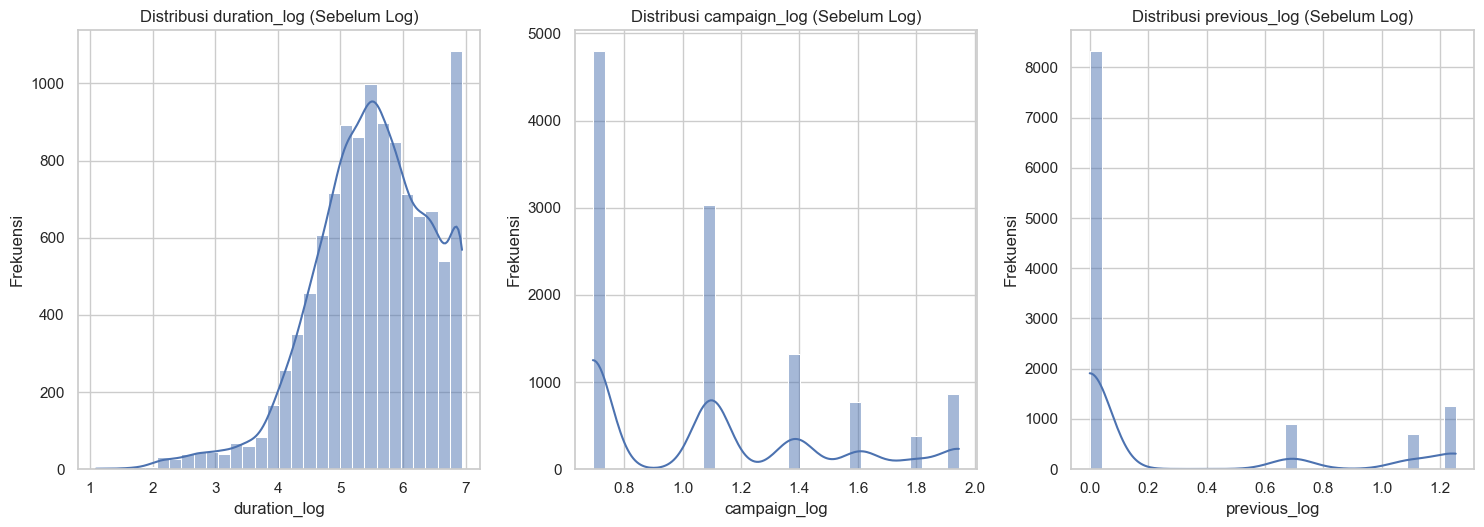


Statistik deskriptif untuk fitur yang divisualisasikan (Sebelum Log):
       duration_log  campaign_log  previous_log
count  11162.000000  11162.000000  11162.000000
mean       5.507456      1.082864      0.264481
std        0.930467      0.412582      0.469108
min        1.098612      0.693147      0.000000
25%        4.934474      0.693147      0.000000
50%        5.545177      1.098612      0.000000
75%        6.208590      1.386294      0.693147
max        6.941190      1.945910      1.252763


In [ ]:
features_to_visualize = [col + '_log' for col in features_to_log_transform]


plt.figure(figsize=(15, 10))
for i, col in enumerate(features_to_visualize):
  if col in df_exp.columns and pd.api.types.is_numeric_dtype(df_exp[col]):
            plt.subplot(2, 3, i + 1) 
            sns.histplot(df_exp[col], kde=True, bins=30)
            plt.title(f'Distribusi {col} (Sebelum Log)')
            plt.xlabel(col)
            plt.ylabel('Frekuensi')
  else:
            print(f"Kolom '{col}' tidak ditemukan atau bukan numerik di df_processed.")
       
            if i < 6 : 
                 fig = plt.gcf() 
                 ax = fig.add_subplot(2, 3, i + 1)
                 ax.text(0.5, 0.5, f"Kolom '{col}'\ntidak ada/\nbukan numerik",
                         horizontalalignment='center', verticalalignment='center',
                         transform=ax.transAxes, color='red')


plt.tight_layout() 
plt.show()
print("\nStatistik deskriptif untuk fitur yang divisualisasikan (Sebelum Log):")
if all(col in df_exp.columns for col in features_to_visualize if pd.api.types.is_numeric_dtype(df_exp.get(col))):
         print(df_exp[features_to_visualize].describe())
else:
      
        valid_cols_for_describe = [c for c in features_to_visualize if c in df_exp.columns and pd.api.types.is_numeric_dtype(df_exp[c])]

# OHE

In [235]:
print(f"Shape df_processed sebelum One-Hot Encoding: {df.shape}")
print("Kolom-kolom sebelum OHE:")
print(df_exp.columns.tolist())
print("\nTipe data sebelum OHE (untuk melihat mana yang 'object' atau 'category'):")
print(df_exp.dtypes)

Shape df_processed sebelum One-Hot Encoding: (11162, 18)
Kolom-kolom sebelum OHE:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'pdays', 'poutcome', 'deposit', 'deposit_encoded', 'duration_log', 'campaign_log', 'previous_log']

Tipe data sebelum OHE (untuk melihat mana yang 'object' atau 'category'):
age                float64
job                 object
marital             object
education           object
default             object
balance            float64
housing             object
loan                object
contact             object
day                  int64
month               object
pdays              float64
poutcome            object
deposit             object
deposit_encoded    float64
duration_log       float64
campaign_log       float64
previous_log       float64
dtype: object


In [236]:
categorical_cols_to_encode = df_exp.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols_to_encode.remove('deposit')
print(f"\nKolom 'deposit' (teks) akan diabaikan dalam One-Hot Encoding.")


Kolom 'deposit' (teks) akan diabaikan dalam One-Hot Encoding.


In [ ]:
if 'balance_status' not in categorical_cols_to_encode and 'balance_status' in df_exp.columns:
    if pd.api.types.is_categorical_dtype(df_exp['balance_status']) or df_exp['balance_status'].dtype == 'object':
        categorical_cols_to_encode.append('balance_status')
  
        categorical_cols_to_encode = list(set(categorical_cols_to_encode))


print(f"\nKolom kategorikal yang akan di One-Hot Encode: {categorical_cols_to_encode}")


Kolom kategorikal yang akan di One-Hot Encode: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [238]:
df_pre_ohe = df_exp.copy()

In [239]:
df_ohe = pd.get_dummies(df_pre_ohe, columns=categorical_cols_to_encode, drop_first=True)

In [240]:
df_ohe.drop('deposit', axis=1, inplace=True)

In [241]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  11162 non-null  float64
 1   balance              11162 non-null  float64
 2   day                  11162 non-null  int64  
 3   pdays                11162 non-null  float64
 4   deposit_encoded      11162 non-null  float64
 5   duration_log         11162 non-null  float64
 6   campaign_log         11162 non-null  float64
 7   previous_log         11162 non-null  float64
 8   job_blue-collar      11162 non-null  bool   
 9   job_entrepreneur     11162 non-null  bool   
 10  job_housemaid        11162 non-null  bool   
 11  job_management       11162 non-null  bool   
 12  job_retired          11162 non-null  bool   
 13  job_self-employed    11162 non-null  bool   
 14  job_services         11162 non-null  bool   
 15  job_student          11162 non-null 

# KMEANS

In [242]:
X_kmeans_unscaled = df_ohe.drop('deposit_encoded', axis=1)
print("\nKolom 'deposit_encoded' dihapus untuk membentuk X_kmeans_unscaled.")


Kolom 'deposit_encoded' dihapus untuk membentuk X_kmeans_unscaled.


In [243]:
print(f"Shape X_kmeans_unscaled (fitur untuk K-Means sebelum scaling): {X_kmeans_unscaled.shape}")


Shape X_kmeans_unscaled (fitur untuk K-Means sebelum scaling): (11162, 41)


In [244]:
numerical_features_for_scaling_kmeans = ['age', 'balance', 'day', 'pdays'] + \
                                          [col + '_log' for col in features_to_log_transform]
actual_numerical_to_scale_kmeans = []
for col in numerical_features_for_scaling_kmeans:
        if col in X_kmeans_unscaled.columns:
            if pd.api.types.is_numeric_dtype(X_kmeans_unscaled[col]):
                actual_numerical_to_scale_kmeans.append(col)
            else:
                print(f"Peringatan: Kolom '{col}' ada tapi bukan numerik di X_kmeans_unscaled.")
        else:
            print(f"Peringatan: Kolom '{col}' tidak ditemukan di X_kmeans_unscaled untuk scaling.")
print(f"\nFitur numerik yang akan di-scale untuk K-Means: {actual_numerical_to_scale_kmeans}")



Fitur numerik yang akan di-scale untuk K-Means: ['age', 'balance', 'day', 'pdays', 'duration_log', 'campaign_log', 'previous_log']


In [ ]:
from sklearn.preprocessing import StandardScaler

X_kmeans_final = X_kmeans_unscaled.copy() # Buat salinan untuk data final K-Means
if actual_numerical_to_scale_kmeans: # Hanya scale jika ada kolom numerik yang valid
        scaler_kmeans = StandardScaler()
        X_kmeans_final[actual_numerical_to_scale_kmeans] = scaler_kmeans.fit_transform(X_kmeans_unscaled[actual_numerical_to_scale_kmeans])
        print("\nPenskalaan fitur numerik untuk K-Means selesai.")
        print("Contoh 5 baris data setelah penskalaan (hanya kolom yang diskalakan):")
        print(X_kmeans_final[actual_numerical_to_scale_kmeans].head())

    
else:
        print("\nTidak ada fitur numerik yang valid untuk di-scale untuk K-Means.")
print(f"\nShape data akhir untuk K-Means (X_kmeans_final): {X_kmeans_final.shape}")
print("Contoh 5 baris data akhir untuk K-Means (X_kmeans_final):")
print(X_kmeans_final.head())



Penskalaan fitur numerik untuk K-Means selesai.
Contoh 5 baris data setelah penskalaan (hanya kolom yang diskalakan):
        age   balance       day     pdays  duration_log  campaign_log  \
0  1.530858  0.908149 -1.265746 -0.578658      1.540945     -0.944623   
1  1.273537 -0.794565 -1.265746 -0.578658      1.540945     -0.944623   
2 -0.013067  0.113105 -1.265746 -0.578658      1.540945     -0.944623   
3  1.187764  1.006696 -1.265746 -0.578658      0.919550     -0.944623   
4  1.101990 -0.691572 -1.265746 -0.578658      1.080983      0.038171   

   previous_log  
0      -0.56382  
1      -0.56382  
2      -0.56382  
3      -0.56382  
4      -0.56382  

Shape data akhir untuk K-Means (X_kmeans_final): (11162, 41)
Contoh 5 baris data akhir untuk K-Means (X_kmeans_final):
        age   balance       day     pdays  duration_log  campaign_log  \
0  1.530858  0.908149 -1.265746 -0.578658      1.540945     -0.944623   
1  1.273537 -0.794565 -1.265746 -0.578658      1.540945     -0.94462

# PCA

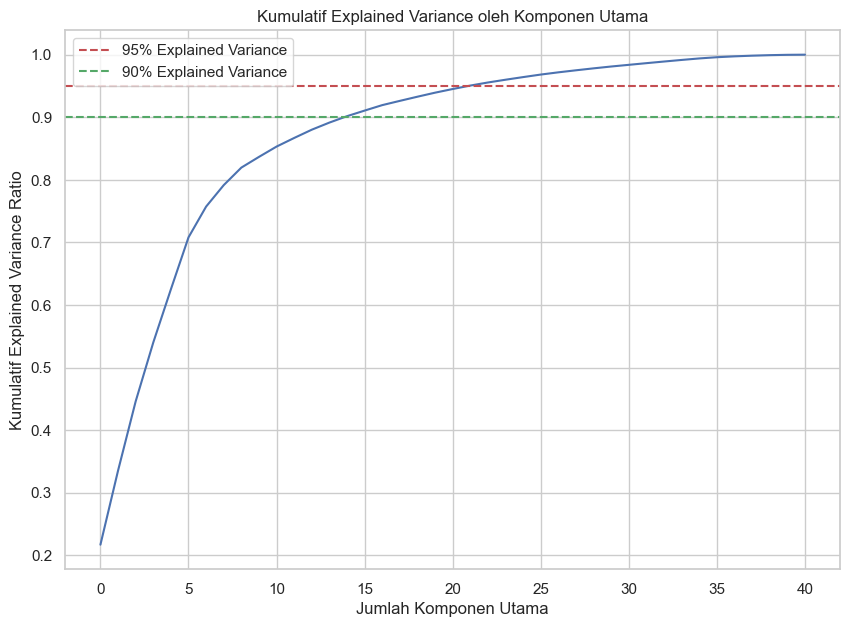

In [ ]:
from sklearn.decomposition import PCA
n_max_components = min(X_kmeans_final.shape[0], X_kmeans_final.shape[1])
pca_analyzer = PCA(n_components=n_max_components, random_state=42)
pca_analyzer.fit(X_kmeans_final)


plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca_analyzer.explained_variance_ratio_))
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Kumulatif Explained Variance Ratio')
plt.title('Kumulatif Explained Variance oleh Komponen Utama')
plt.grid(True)

plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Explained Variance')
plt.legend(loc='best')
plt.show()

In [ ]:
explained_variance_cumulative = np.cumsum(pca_analyzer.explained_variance_ratio_)
try:
  components_for_95_variance = np.where(explained_variance_cumulative >= 0.95)[0][0] + 1
  print(f"\nJumlah komponen untuk menangkap setidaknya 95% varians: {components_for_95_variance}")
except IndexError:
  print("\nTidak bisa mencapai 95% varians dengan jumlah komponen saat ini (mungkin semua komponen sudah terpakai).")
  components_for_95_variance = n_max_components
try:
  components_for_90_variance = np.where(explained_variance_cumulative >= 0.90)[0][0] + 1
  print(f"Jumlah komponen untuk menangkap setidaknya 90% varians: {components_for_90_variance}")
except IndexError:
  print("\nTidak bisa mencapai 90% varians dengan jumlah komponen saat ini.")
  components_for_90_variance = n_max_components
  print(f"Total fitur asli: {X_kmeans_exp.shape[1]}")




Jumlah komponen untuk menangkap setidaknya 95% varians: 22
Jumlah komponen untuk menangkap setidaknya 90% varians: 15


In [248]:
n_components_chosen = 22
pca = PCA(n_components=n_components_chosen, random_state=42)
X_pca_for_kmeans = pca.fit_transform(X_kmeans_final)
pca_columns = [f'PC_{i+1}' for i in range(n_components_chosen)]

X_pca_for_kmeans_df = pd.DataFrame(X_pca_for_kmeans, columns=pca_columns, index=X_kmeans_final.index)
print(f"\nPCA dengan {n_components_chosen} komponen selesai.")
print(f"Shape data baru (X_pca_for_kmeans_df): {X_pca_for_kmeans_df.shape}")



PCA dengan 22 komponen selesai.
Shape data baru (X_pca_for_kmeans_df): (11162, 22)


In [249]:
print("Contoh 5 baris data setelah PCA:")
print(X_pca_for_kmeans_df.head())


Contoh 5 baris data setelah PCA:
       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0 -0.377605  1.549282 -2.408890 -0.356942 -0.355443  0.198527 -1.009905   
1 -0.548165  0.573178 -2.184499 -0.976083 -1.426372  0.008218 -0.434962   
2 -0.536859 -0.072922 -2.283978 -0.141750 -0.376504  0.281180 -1.021623   
3 -0.422695  1.281892 -2.067694 -0.521195  0.157774  0.051766 -1.114417   
4 -0.703452  0.613809 -1.339282 -0.954654 -1.043149  0.732995  0.546375   

       PC_8      PC_9     PC_10  ...     PC_13     PC_14     PC_15     PC_16  \
0  0.658902 -0.596895  0.033058  ... -0.329644  0.156592  0.028725  0.155814   
1  0.130852 -0.274884 -0.559747  ... -0.457285  0.558099  0.057811  0.175172   
2  0.647533 -0.082490  0.086024  ...  0.219185  0.254885  0.000628  0.354533   
3  0.648395 -0.487805  0.057763  ... -0.515760  0.314672 -0.186027 -0.207566   
4  0.686807 -0.424932 -0.602047  ...  0.039558  0.716383 -0.086544 -0.094961   

      PC_17     PC_18     PC_19    

In [250]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [251]:
data_for_clustering_pca = X_pca_for_kmeans_df

In [252]:
wcss_pca = []
k_range_pca = range(2, 11)
print("Menghitung WCSS untuk Elbow Method pada data PCA...")
for i in k_range_pca:
        kmeans_elbow_pca = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans_elbow_pca.fit(data_for_clustering_pca)
        wcss_pca.append(kmeans_elbow_pca.inertia_)

Menghitung WCSS untuk Elbow Method pada data PCA...


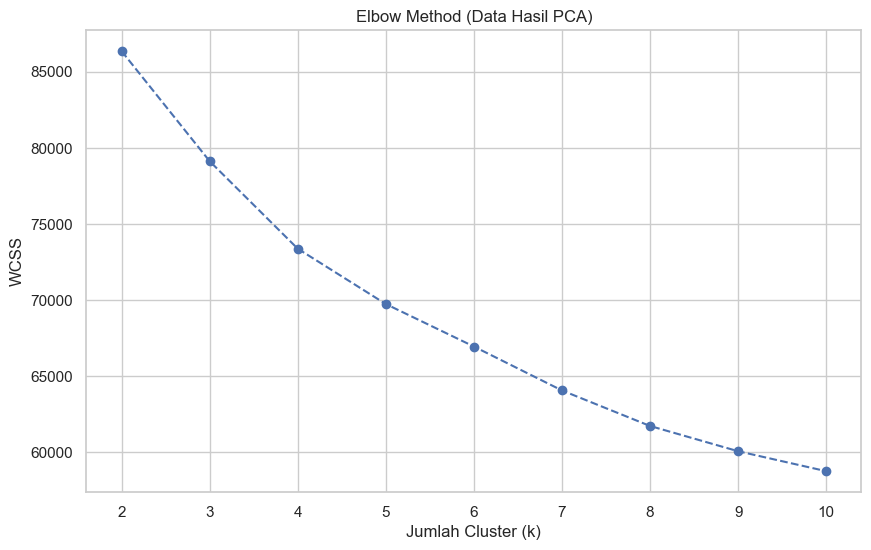

In [253]:
plt.figure(figsize=(10, 6))
plt.plot(k_range_pca, wcss_pca, marker='o', linestyle='--')
plt.title('Elbow Method (Data Hasil PCA)')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.xticks(list(k_range_pca))
plt.grid(True)
plt.show()

In [254]:
silhouette_scores_pca = []
print("\nMenghitung Silhouette Scores pada data PCA...")
for i in k_range_pca:
  kmeans_silhouette_pca = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
  cluster_labels_pca = kmeans_silhouette_pca.fit_predict(data_for_clustering_pca)
  if len(np.unique(cluster_labels_pca)) > 1:
    silhouette_avg_pca = silhouette_score(data_for_clustering_pca, cluster_labels_pca)
    silhouette_scores_pca.append(silhouette_avg_pca)
    print(f"Untuk k = {i}, rata-rata Silhouette Score adalah: {silhouette_avg_pca:.4f}")
  else:
      silhouette_scores_pca.append(-1)
      print(f"Untuk k = {i}, tidak bisa menghitung Silhouette Score.")


Menghitung Silhouette Scores pada data PCA...
Untuk k = 2, rata-rata Silhouette Score adalah: 0.2534
Untuk k = 3, rata-rata Silhouette Score adalah: 0.1497
Untuk k = 4, rata-rata Silhouette Score adalah: 0.1501
Untuk k = 5, rata-rata Silhouette Score adalah: 0.1347
Untuk k = 6, rata-rata Silhouette Score adalah: 0.1133
Untuk k = 7, rata-rata Silhouette Score adalah: 0.1108
Untuk k = 8, rata-rata Silhouette Score adalah: 0.1122
Untuk k = 9, rata-rata Silhouette Score adalah: 0.1122
Untuk k = 10, rata-rata Silhouette Score adalah: 0.1062


In [ ]:
k_final = 4 
print(f"--- Melatih Model K-Means Final dengan k = {k_final} pada Data Hasil PCA ---")

--- Melatih Model K-Means Final dengan k = 4 pada Data Hasil PCA ---


In [256]:
kmeans_final_model = KMeans(n_clusters=k_final, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels_final = kmeans_final_model.fit_predict(X_pca_for_kmeans)

In [257]:
if len(df_exp) == len(cluster_labels_final):
        df_clustered_final = df_exp.copy()
        df_clustered_final['cluster'] = cluster_labels_final
        print("Label cluster (k=4) berhasil ditambahkan ke DataFrame untuk profiling.")
else:
        print(f"Error: Panjang df_processed ({len(df_exp)}) tidak sama dengan panjang cluster_labels_final ({len(cluster_labels_final)}).")
        print("Tidak bisa melanjutkan profiling. Periksa konsistensi data Anda.")
        # exit()
if 'df_clustered_final' in locals():
        print(f"\n--- HASIL PROFILING FINAL UNTUK k = {k_final} ---")
        print(f"Jumlah anggota per cluster:")
        print(df_clustered_final['cluster'].value_counts().sort_index())


Label cluster (k=4) berhasil ditambahkan ke DataFrame untuk profiling.

--- HASIL PROFILING FINAL UNTUK k = 4 ---
Jumlah anggota per cluster:
cluster
0    2400
1    4276
2    2824
3    1662
Name: count, dtype: int64


In [258]:
numerical_features_final = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
valid_numerical_for_profile = [col for col in numerical_features_final if col in df_clustered_final.columns]
if valid_numerical_for_profile:
  print(f"\nRata-rata fitur numerik per cluster:")
  profiling_numerical_final = df_clustered_final.groupby('cluster')[valid_numerical_for_profile].mean().round(2)
  print(profiling_numerical_final)
else:
  print("Tidak ada kolom numerik valid untuk profiling.")


Rata-rata fitur numerik per cluster:
           age  balance    day  pdays
cluster                              
0        41.78   523.40  20.28  -0.99
1        38.74   462.30  13.64  -0.98
2        41.70  1288.81  14.45  52.62
3        45.53  3369.03  16.22  -0.97



Analisis Tingkat Konversi per Cluster:
         conversion_rate  cluster_size
cluster                               
0               0.250000          2400
1               0.445744          4276
2               0.671388          2824
3               0.533694          1662


C:\Users\Salma Afidah\AppData\Local\Temp\ipykernel_5108\3728462250.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profiling_target_final.index, y='conversion_rate', data=profiling_target_final, palette='viridis')


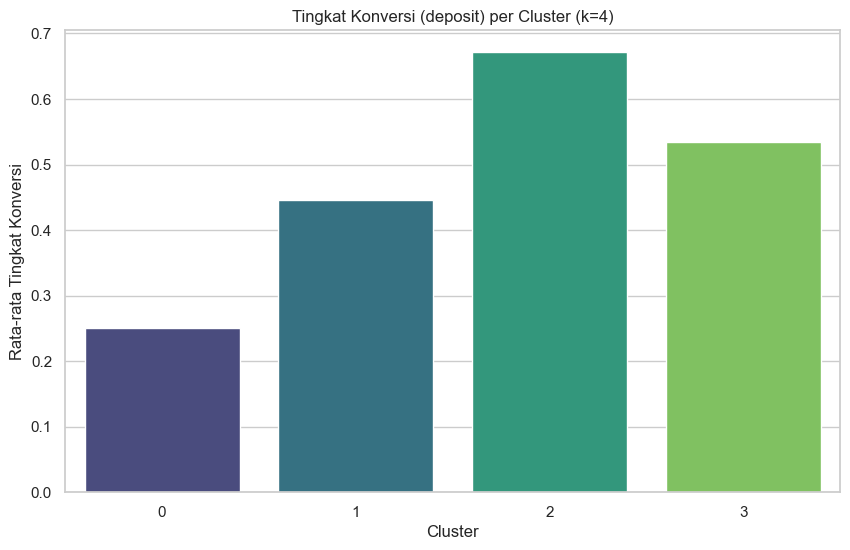

In [259]:
if 'deposit_encoded' in df_clustered_final.columns:
            print(f"\nAnalisis Tingkat Konversi per Cluster:")
            profiling_target_final = df_clustered_final.groupby('cluster')['deposit_encoded'].agg(['mean', 'count'])
            profiling_target_final.rename(columns={'mean': 'conversion_rate', 'count': 'cluster_size'}, inplace=True)
            print(profiling_target_final)

            plt.figure(figsize=(10, 6))
            sns.barplot(x=profiling_target_final.index, y='conversion_rate', data=profiling_target_final, palette='viridis')
            plt.title(f'Tingkat Konversi (deposit) per Cluster (k={k_final})')
            plt.ylabel('Rata-rata Tingkat Konversi')
            plt.xlabel('Cluster')
            plt.show()
else:
            print("Kolom 'deposit_encoded' tidak ditemukan.")


In [260]:
key_categorical_features_final = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

print(f"\nAnalisis Fitur Kategorikal per Cluster:")
for col in key_categorical_features_final:
  if col in df_clustered_final.columns:
    print(f"\nDistribusi '{col}' per cluster (%):")
    crosstab_df = pd.crosstab(df_clustered_final['cluster'], df_clustered_final[col], normalize='index')
    print(crosstab_df.multiply(100).round(1))
  else:
      print(f"Info: Kolom '{col}' tidak ditemukan.")


Analisis Fitur Kategorikal per Cluster:

Distribusi 'job' per cluster (%):
job      admin.  blue-collar  entrepreneur  housemaid  management  retired  \
cluster                                                                      
0          10.9         17.9           3.8        2.8        25.8      5.2   
1          12.7         21.4           3.0        2.3        19.4      4.4   
2          13.8         13.1           1.9        1.8        26.2      8.7   
3           8.3         14.0           3.4        3.4        27.0     13.2   

job      self-employed  services  student  technician  unemployed  
cluster                                                            
0                  3.4       8.1      1.1        18.1         2.9  
1                  3.8      10.2      3.6        15.9         3.3  
2                  3.5       7.0      5.1        15.7         3.4  
3                  3.7       5.7      2.2        15.9         3.1  

Distribusi 'marital' per cluster (%):
marital 

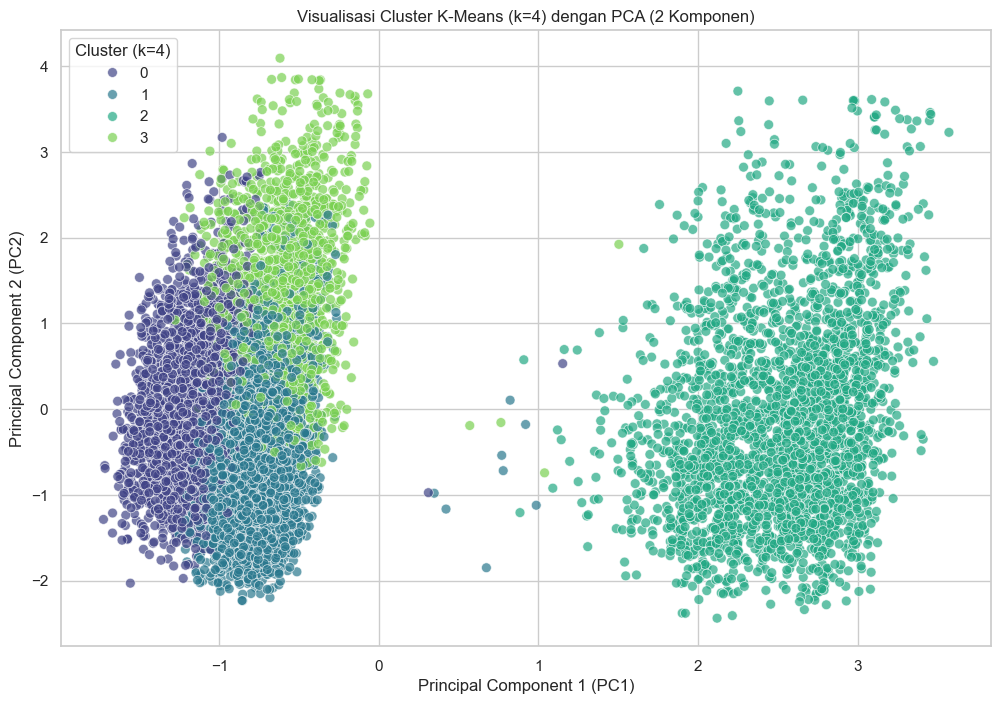

In [261]:
if 'X_pca_for_kmeans' in locals():
            # Kita bisa gunakan hasil PCA 2D untuk visualisasi yang lebih mudah dilihat
            pca_final_2d = PCA(n_components=2, random_state=42)
            X_pca_final_2d = pca_final_2d.fit_transform(X_pca_for_kmeans) # Gunakan data PCA (22 komponen) sebagai input
            df_pca_final_2d = pd.DataFrame(data=X_pca_final_2d, columns=['PC1', 'PC2'])
            df_pca_final_2d['cluster'] = cluster_labels_final

            plt.figure(figsize=(12, 8))
            sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca_final_2d,
                            palette=sns.color_palette("viridis", n_colors=k_final),
                            s=50, alpha=0.7)
            plt.title(f'Visualisasi Cluster K-Means (k={k_final}) dengan PCA (2 Komponen)')
            plt.xlabel('Principal Component 1 (PC1)')
            plt.ylabel('Principal Component 2 (PC2)')
            plt.legend(title=f'Cluster (k={k_final})')
            plt.grid(True)
            plt.show()


# LOGISTIC REGRESSION

In [262]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  11162 non-null  float64
 1   balance              11162 non-null  float64
 2   day                  11162 non-null  int64  
 3   pdays                11162 non-null  float64
 4   deposit_encoded      11162 non-null  float64
 5   duration_log         11162 non-null  float64
 6   campaign_log         11162 non-null  float64
 7   previous_log         11162 non-null  float64
 8   job_blue-collar      11162 non-null  bool   
 9   job_entrepreneur     11162 non-null  bool   
 10  job_housemaid        11162 non-null  bool   
 11  job_management       11162 non-null  bool   
 12  job_retired          11162 non-null  bool   
 13  job_self-employed    11162 non-null  bool   
 14  job_services         11162 non-null  bool   
 15  job_student          11162 non-null 

In [263]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [264]:
df_for_lr_binning = df_ohe.copy()

In [265]:
bins = [-np.inf, -0.00001, 550, 1708, np.inf]
labels = ['Negative', 'Low', 'Medium', 'High']

In [266]:
if 'balance' in df_for_lr_binning.columns:
  df_for_lr_binning['balance_status'] = pd.cut(df_for_lr_binning['balance'], bins=bins, labels=labels, right=True)
  df_for_lr_binning.drop('balance', axis=1, inplace=True)
  print("Kolom 'balance_status' dibuat dan kolom 'balance' numerik asli dihapus.")
else:
  print("Peringatan: Kolom 'balance' tidak ditemukan untuk di-binning.")

Kolom 'balance_status' dibuat dan kolom 'balance' numerik asli dihapus.


In [267]:
df_for_lr_binning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  11162 non-null  float64 
 1   day                  11162 non-null  int64   
 2   pdays                11162 non-null  float64 
 3   deposit_encoded      11162 non-null  float64 
 4   duration_log         11162 non-null  float64 
 5   campaign_log         11162 non-null  float64 
 6   previous_log         11162 non-null  float64 
 7   job_blue-collar      11162 non-null  bool    
 8   job_entrepreneur     11162 non-null  bool    
 9   job_housemaid        11162 non-null  bool    
 10  job_management       11162 non-null  bool    
 11  job_retired          11162 non-null  bool    
 12  job_self-employed    11162 non-null  bool    
 13  job_services         11162 non-null  bool    
 14  job_student          11162 non-null  bool    
 15  job_technician     

In [268]:
categorical_cols_for_lr = df_for_lr_binning.select_dtypes(include=['object', 'category']).columns.tolist()
if 'deposit' in categorical_cols_for_lr: categorical_cols_for_lr.remove('deposit')
if 'deposit_encoded' in categorical_cols_for_lr: categorical_cols_for_lr.remove('deposit_encoded')
df_ohe_lr = pd.get_dummies(df_for_lr_binning, columns=categorical_cols_for_lr, drop_first=True)
if 'deposit' in df_ohe_lr.columns and df_ohe_lr['deposit'].dtype == 'object':
  df_ohe_lr.drop('deposit', axis=1, inplace=True)
  print(f"Shape setelah OHE: {df_ohe_lr.shape}")

In [269]:
df_ohe_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    11162 non-null  float64
 1   day                    11162 non-null  int64  
 2   pdays                  11162 non-null  float64
 3   deposit_encoded        11162 non-null  float64
 4   duration_log           11162 non-null  float64
 5   campaign_log           11162 non-null  float64
 6   previous_log           11162 non-null  float64
 7   job_blue-collar        11162 non-null  bool   
 8   job_entrepreneur       11162 non-null  bool   
 9   job_housemaid          11162 non-null  bool   
 10  job_management         11162 non-null  bool   
 11  job_retired            11162 non-null  bool   
 12  job_self-employed      11162 non-null  bool   
 13  job_services           11162 non-null  bool   
 14  job_student            11162 non-null  bool   
 15  jo

In [270]:
if 'duration_log' in df_ohe_lr.columns:
  X_unscaled_lr = df_ohe_lr.drop(['deposit_encoded', 'duration_log'], axis=1)
  print("Kolom 'deposit_encoded' dan 'duration_log' dihapus untuk membentuk set fitur X.")
  X_unscaled_lr = df_ohe_lr.drop('deposit_encoded', axis=1)
  print("Kolom 'deposit_encoded' dihapus untuk membentuk set fitur X. ('duration' tidak ditemukan).")

Kolom 'deposit_encoded' dan 'duration_log' dihapus untuk membentuk set fitur X.
Kolom 'deposit_encoded' dihapus untuk membentuk set fitur X. ('duration' tidak ditemukan).


In [271]:
y_lr = df_ohe_lr['deposit_encoded']

In [272]:
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(
X_unscaled_lr, y_lr, test_size=0.2, random_state=42, stratify=y_lr)

In [ ]:
numerical_features_to_scale = ['age', 'day', 'campaign', 'pdays', 'previous']
actual_numerical_to_scale = [col for col in numerical_features_to_scale if col in X_train_unscaled.columns]
print(f"Fitur numerik yang akan di-scale: {actual_numerical_to_scale}")
scaler_lr_binned = StandardScaler()
X_train_final_binned = X_train_unscaled.copy()
X_test_final_binned = X_test_unscaled.copy()

        # Fit scaler HANYA pada data latih
scaler_lr_binned.fit(X_train_unscaled[actual_numerical_to_scale])

        # Transform pada data latih dan data uji
X_train_final_binned[actual_numerical_to_scale] = scaler_lr_binned.transform(X_train_unscaled[actual_numerical_to_scale])
X_test_final_binned[actual_numerical_to_scale] = scaler_lr_binned.transform(X_test_unscaled[actual_numerical_to_scale])

print("Penskalaan fitur numerik selesai.")



print("\n--- Persiapan Data untuk Regresi Logistik (dengan Binning) Selesai! ---")
print("Anda sekarang memiliki set data final:")
print(f" - X_train_final_binned (shape: {X_train_final_binned.shape})")
print(f" - X_test_final_binned (shape: {X_test_final_binned.shape})")
print(f" - y_train (shape: {y_train.shape})")
print(f" - y_test (shape: {y_test.shape})")

Fitur numerik yang akan di-scale: ['age', 'day', 'pdays']
Penskalaan fitur numerik selesai.

--- Persiapan Data untuk Regresi Logistik (dengan Binning) Selesai! ---
Anda sekarang memiliki set data final:
 - X_train_final_binned (shape: (8929, 43))
 - X_test_final_binned (shape: (2233, 43))
 - y_train (shape: (8929,))
 - y_test (shape: (2233,))


In [274]:
X_train_final_binned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8929 entries, 8644 to 9743
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    8929 non-null   float64
 1   day                    8929 non-null   float64
 2   pdays                  8929 non-null   float64
 3   duration_log           8929 non-null   float64
 4   campaign_log           8929 non-null   float64
 5   previous_log           8929 non-null   float64
 6   job_blue-collar        8929 non-null   bool   
 7   job_entrepreneur       8929 non-null   bool   
 8   job_housemaid          8929 non-null   bool   
 9   job_management         8929 non-null   bool   
 10  job_retired            8929 non-null   bool   
 11  job_self-employed      8929 non-null   bool   
 12  job_services           8929 non-null   bool   
 13  job_student            8929 non-null   bool   
 14  job_technician         8929 non-null   bool   
 15  job_un

In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [276]:
log_reg_binned = LogisticRegression(random_state=42, max_iter=1000)
print("Melatih model pada data dengan 'balance' yang di-binning...")
log_reg_binned.fit(X_train_final_binned, y_train)
print("Pelatihan model selesai.")

Melatih model pada data dengan 'balance' yang di-binning...
Pelatihan model selesai.


In [277]:
y_pred_binned = log_reg_binned.predict(X_test_final_binned)
y_pred_proba_binned = log_reg_binned.predict_proba(X_test_final_binned)[:, 1]

In [ ]:
# Akurasi
accuracy_binned = accuracy_score(y_test, y_pred_binned)
print(f"\nAkurasi pada Data Uji: {accuracy_binned*100:.2f}%")


Akurasi pada Data Uji: 82.04%


In [ ]:
 # Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binned, target_names=['No Deposit (0)', 'Yes Deposit (1)']))


Classification Report:
                 precision    recall  f1-score   support

 No Deposit (0)       0.84      0.82      0.83      1175
Yes Deposit (1)       0.80      0.82      0.81      1058

       accuracy                           0.82      2233
      macro avg       0.82      0.82      0.82      2233
   weighted avg       0.82      0.82      0.82      2233



In [280]:
auc_score_binned = roc_auc_score(y_test, y_pred_proba_binned)
print(f"\nSkor AUC (Area Under the ROC Curve): {auc_score_binned:.4f}")



Skor AUC (Area Under the ROC Curve): 0.9014



Confusion Matrix:


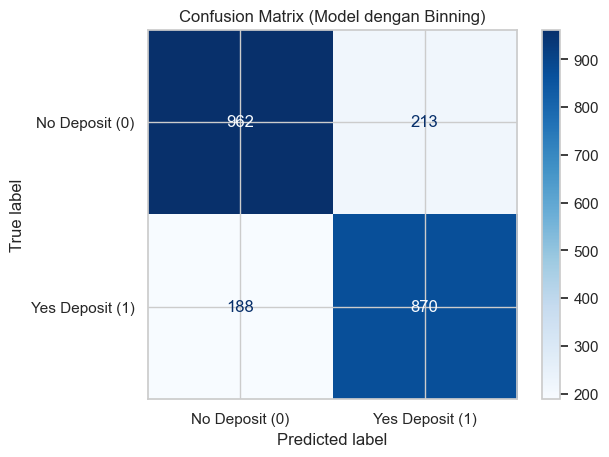

In [281]:
cm_binned = confusion_matrix(y_test, y_pred_binned)
disp_binned = ConfusionMatrixDisplay(confusion_matrix=cm_binned, display_labels=['No Deposit (0)', 'Yes Deposit (1)'])
print("\nConfusion Matrix:")
disp_binned.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Model dengan Binning)')
plt.show()

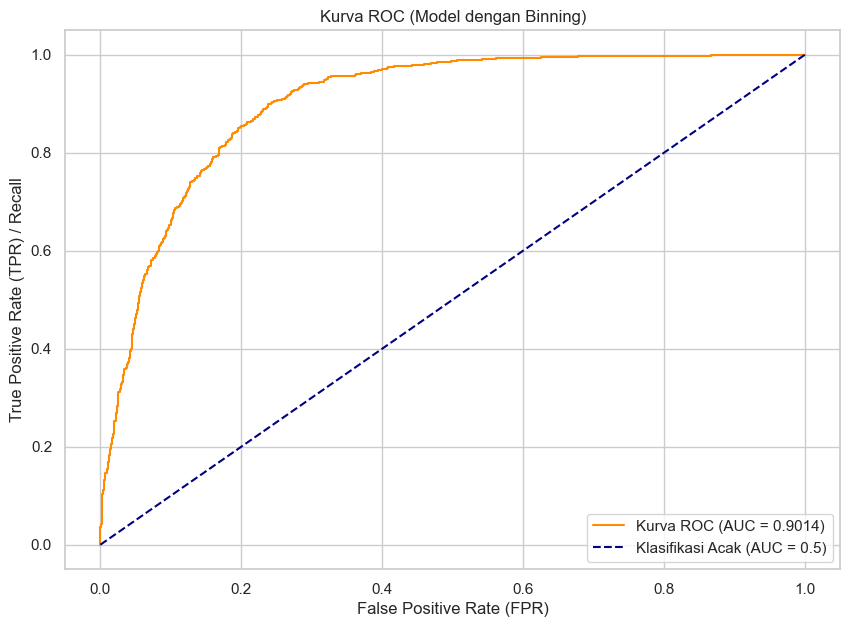

In [282]:
fpr_binned, tpr_binned, _ = roc_curve(y_test, y_pred_proba_binned)
plt.figure(figsize=(10, 7))
plt.plot(fpr_binned, tpr_binned, color='darkorange', label=f'Kurva ROC (AUC = {auc_score_binned:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Klasifikasi Acak (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.title('Kurva ROC (Model dengan Binning)')
plt.legend()
plt.grid(True)
plt.show()


# GridserachCV

In [283]:
from sklearn.model_selection import GridSearchCV

In [284]:
log_reg_base_binned = LogisticRegression(random_state=42, max_iter=1000)
param_grid_binned = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }

In [285]:
grid_search_binned = GridSearchCV(estimator=log_reg_base_binned,
                                      param_grid=param_grid_binned,
                                      scoring='roc_auc',
                                      cv=5, # 5-fold cross-validation
                                      verbose=1,
                                      n_jobs=-1) # Gunakan semua core CPU

In [ ]:
print("Mencari hyperparameter terbaik")
grid_search_binned.fit(X_train_final_binned, y_train)

Mencari hyperparameter terbaik... Proses ini mungkin memerlukan beberapa saat.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='roc_auc', verbose=1)

In [287]:
print("Hyperparameter terbaik yang ditemukan:")
print(grid_search_binned.best_params_)
print("\nSkor ROC AUC terbaik dari cross-validation pada data latih:")
print(f"{grid_search_binned.best_score_:.4f}")


Hyperparameter terbaik yang ditemukan:
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

Skor ROC AUC terbaik dari cross-validation pada data latih:
0.9006


In [288]:
best_log_reg_model_binned = grid_search_binned.best_estimator_
print("\nModel terbaik ('best_log_reg_model_binned') telah disimpan dan siap untuk evaluasi pada data uji.")


Model terbaik ('best_log_reg_model_binned') telah disimpan dan siap untuk evaluasi pada data uji.


In [289]:
y_pred_final_tuned = best_log_reg_model_binned.predict(X_test_final_binned)
y_pred_proba_final_tuned = best_log_reg_model_binned.predict_proba(X_test_final_binned)[:, 1]


In [290]:
accuracy_final_tuned = accuracy_score(y_test, y_pred_final_tuned)
print(f"\nAkurasi Final pada Data Uji: {accuracy_final_tuned*100:.2f}%")


Akurasi Final pada Data Uji: 82.18%


In [291]:
print("\nClassification Report Final:")
print(classification_report(y_test, y_pred_final_tuned, target_names=['No Deposit (0)', 'Yes Deposit (1)']))


Classification Report Final:
                 precision    recall  f1-score   support

 No Deposit (0)       0.84      0.82      0.83      1175
Yes Deposit (1)       0.81      0.82      0.81      1058

       accuracy                           0.82      2233
      macro avg       0.82      0.82      0.82      2233
   weighted avg       0.82      0.82      0.82      2233



In [292]:
auc_score_final_tuned = roc_auc_score(y_test, y_pred_proba_final_tuned)
print(f"\nSkor AUC Final: {auc_score_final_tuned:.4f}")


Skor AUC Final: 0.9017



Confusion Matrix Final:


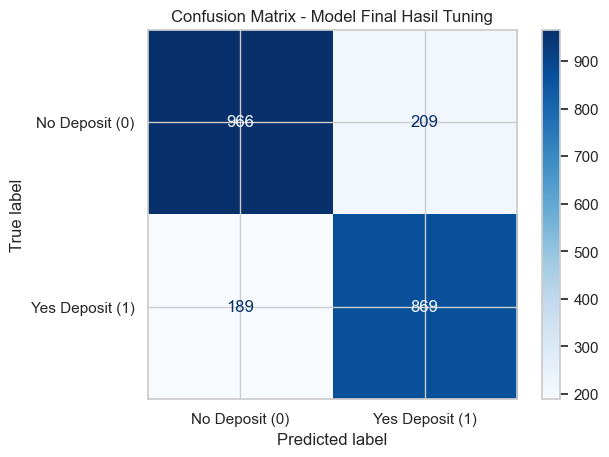

In [293]:
cm_final_tuned = confusion_matrix(y_test, y_pred_final_tuned)
disp_final_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_final_tuned, display_labels=['No Deposit (0)', 'Yes Deposit (1)'])

print("\nConfusion Matrix Final:")
disp_final_tuned.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Model Final Hasil Tuning')
plt.show()


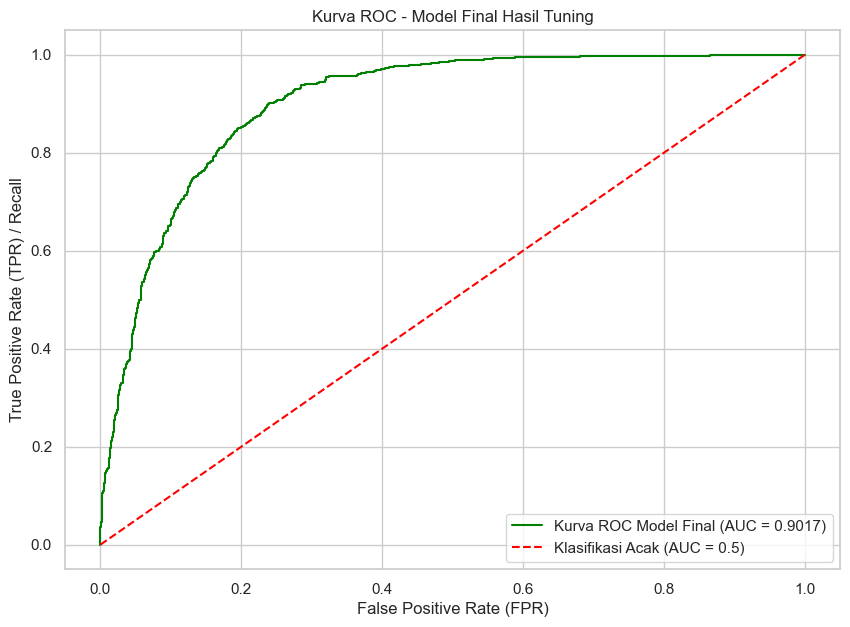

In [294]:
fpr_final_tuned, tpr_final_tuned, _ = roc_curve(y_test, y_pred_proba_final_tuned)

plt.figure(figsize=(10, 7))
plt.plot(fpr_final_tuned, tpr_final_tuned, color='green', label=f'Kurva ROC Model Final (AUC = {auc_score_final_tuned:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Klasifikasi Acak (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.title('Kurva ROC - Model Final Hasil Tuning')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
 # Membuat prediksi pada data latih
y_pred_train_final = best_log_reg_model_binned.predict(X_train_final_binned)
y_pred_proba_train_final = best_log_reg_model_binned.predict_proba(X_train_final_binned)[:, 1]

    # Menghitung metrik performa pada data latih
accuracy_train_final = accuracy_score(y_train, y_pred_train_final)
auc_score_train_final = roc_auc_score(y_train, y_pred_proba_train_final)

print(f"\nAkurasi pada Data Latih: {accuracy_train_final*100:.2f}%")
print(f"Skor AUC pada Data Latih: {auc_score_train_final:.4f}")

    # Mengambil kembali skor data uji untuk perbandingan langsung
accuracy_test_final = 82.18 # 
auc_test_final = 0.9014 

print("\n--- Perbandingan Performa ---")
print(f"Akurasi: {accuracy_train_final*100:.2f}% (Latih) vs. {accuracy_test_final:.2f}% (Uji)")
print(f"Skor AUC: {auc_score_train_final:.4f} (Latih) vs. {auc_test_final:.4f} (Uji)")


Akurasi pada Data Latih: 82.78%
Skor AUC pada Data Latih: 0.9033

--- Perbandingan Performa ---
Akurasi: 82.78% (Latih) vs. 82.18% (Uji)
Skor AUC: 0.9033 (Latih) vs. 0.9014 (Uji)


In [296]:
coefficients = pd.DataFrame({
      'Fitur': X_train_final_binned.columns,
      'Koefisien': best_log_reg_model_binned.coef_[0]})

coefficients['Abs_Koefisien'] = np.abs(coefficients['Koefisien'])
coefficients = coefficients.sort_values(by='Abs_Koefisien', ascending=False)
print("15 Fitur dengan Pengaruh Terkuat (Positif atau Negatif):")
print(coefficients.head(15))

15 Fitur dengan Pengaruh Terkuat (Positif atau Negatif):
                  Fitur  Koefisien  Abs_Koefisien
38     poutcome_success   2.298902       2.298902
32            month_mar   2.113346       2.113346
3          duration_log   2.029925       2.029925
25      contact_unknown  -1.309949       1.309949
27            month_dec   1.300605       1.300605
29            month_jan  -1.095058       1.095058
35            month_oct   0.972128       0.972128
30            month_jul  -0.931546       0.931546
34            month_nov  -0.907079       0.907079
36            month_sep   0.819944       0.819944
13          job_student   0.756957       0.756957
26            month_aug  -0.741767       0.741767
33            month_may  -0.657242       0.657242
22          housing_yes  -0.615286       0.615286
42  balance_status_High   0.576286       0.576286


C:\Users\Salma Afidah\AppData\Local\Temp\ipykernel_5108\3583002993.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Koefisien', y='Fitur', data=top_15_features, palette=colors)


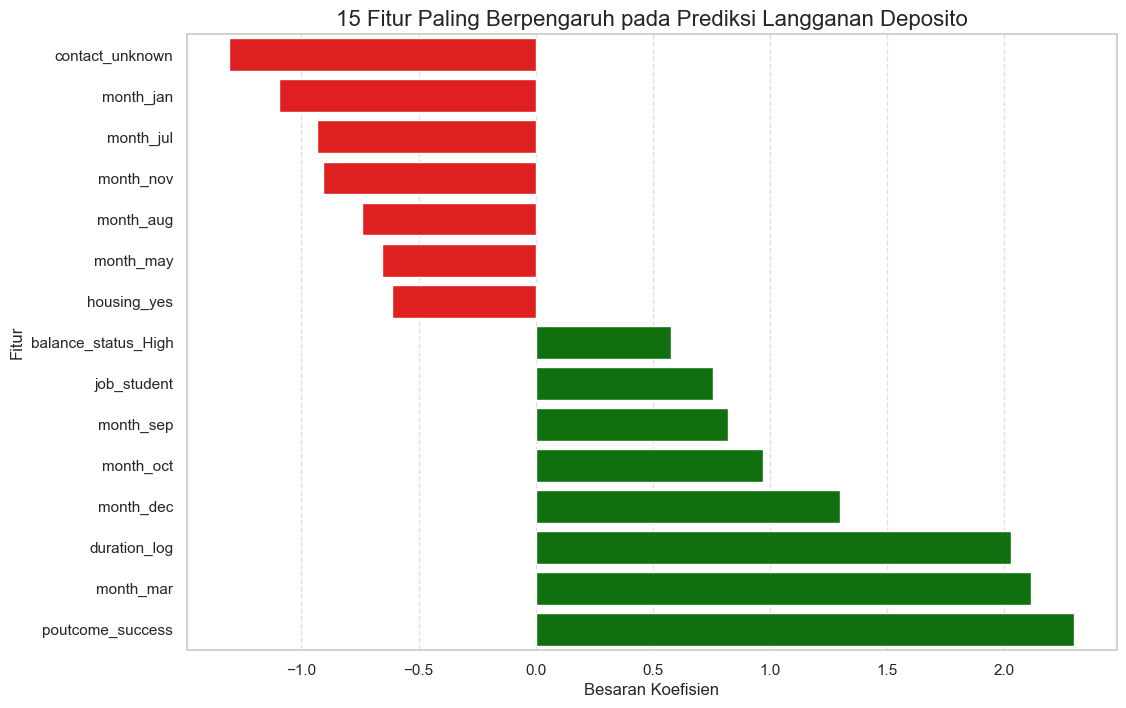

In [297]:
if 'coefficients' in locals():
  top_15_features = coefficients.head(15).sort_values(by='Koefisien', ascending=True)
  plt.figure(figsize=(12, 8))
  colors = ['red' if c < 0 else 'green' for c in top_15_features['Koefisien']]
  sns.barplot(x='Koefisien', y='Fitur', data=top_15_features, palette=colors)
  plt.title('15 Fitur Paling Berpengaruh pada Prediksi Langganan Deposito', fontsize=16)
  plt.xlabel('Besaran Koefisien', fontsize=12)
  plt.ylabel('Fitur', fontsize=12)
  plt.grid(axis='x', linestyle='--', alpha=0.6)
  plt.show()


# Deployment

In [298]:
import joblib
import pandas as pd

In [299]:
import joblib

# Muat kembali daftar kolom yang telah Anda simpan
try:
    kolom_tersimpan = joblib.load('X_reg_columns_final.pkl') # Sesuaikan path jika perlu
    
    print(f"Berhasil memuat 'X_reg_columns_final.pkl'. Total kolom: {len(kolom_tersimpan)}")
    
    # Cek apakah 'campaign' dan 'previous' ada di dalam daftar
    if 'campaign' in kolom_tersimpan:
        print("✅ 'campaign' ditemukan dalam daftar.")
    else:
        print("❌ 'campaign' TIDAK DITEMUKAN dalam daftar.")
        
    if 'previous' in kolom_tersimpan:
        print("✅ 'previous' ditemukan dalam daftar.")
    else:
        print("❌ 'previous' TIDAK DITEMUKAN dalam daftar.")

    # Tampilkan beberapa contoh kolom untuk inspeksi
    # print("\nContoh beberapa kolom yang tersimpan:", kolom_tersimpan[:10])

except FileNotFoundError:
    print("File 'X_reg_columns_final.pkl' tidak ditemukan. Pastikan Anda sudah menyimpannya.")

File 'X_reg_columns_final.pkl' tidak ditemukan. Pastikan Anda sudah menyimpannya.


In [302]:
categorical_options = {
    'job': df['job'].unique().tolist(),
    'marital': df['marital'].unique().tolist(),
    'education': df['education'].unique().tolist(),
    'default': df['default'].unique().tolist(),
    'housing': df['housing'].unique().tolist(),
    'loan': df['loan'].unique().tolist(),
    'contact': df['contact'].unique().tolist(),
    'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
    'poutcome': df['poutcome'].unique().tolist()
}



In [304]:
!pip install streamlit pyngrok -q


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import joblib

print("--- Memulai Proses Pembuatan Ulang Artefak ---")

# --- 1. Muat dan Lakukan Preprocessing Awal ---
df = pd.read_csv('tubesdatmin.csv')

# Encoding target
df['deposit_encoded'] = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

# Outlier Capping
def cap_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25); Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1; lower_bound = Q1 - 1.5 * IQR; upper_bound = Q3 + 1.5 * IQR
    dataframe[column] = dataframe[column].clip(lower=lower_bound, upper=upper_bound)
    return dataframe
numerical_cols_to_cap = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for col in numerical_cols_to_cap:
    df = cap_outliers_iqr(df, col)

# Imputasi Job
job_mode = df[df['job'] != 'unknown']['job'].mode()[0]
df['job'].replace('unknown', job_mode, inplace=True)
print("1. Preprocessing awal (outlier, imputasi job) selesai.")

# --- 2. Feature Engineering SPESIFIK untuk Model Terbaik---
df_fe = df.copy()
# Binning 'balance'
bins = [-np.inf, -0.0001, 550, 1708, np.inf]
labels = ['Negative', 'Low', 'Medium', 'High']
df_fe['balance_status'] = pd.cut(df_fe['balance'], bins=bins, labels=labels, right=True)
df_fe.drop('balance', axis=1, inplace=True)

# Transformasi Log
features_to_log_transform = ['campaign', 'previous']
for col in features_to_log_transform:
    df_fe[col + '_log'] = np.log1p(df_fe[col])
    df_fe.drop(col, axis=1, inplace=True)
print("2. Feature Engineering (binning, log transform) selesai.")

# --- 3. One-Hot Encoding ---
categorical_cols = df_fe.select_dtypes(include=['object', 'category']).columns.tolist()
if 'deposit' in categorical_cols: categorical_cols.remove('deposit')
df_ohe = pd.get_dummies(df_fe, columns=categorical_cols, drop_first=True)
if 'deposit' in df_ohe.columns: df_ohe.drop('deposit', axis=1, inplace=True)
print("3. One-Hot Encoding selesai.")

# --- 4. Persiapan Data Final untuk Model ---
X = df_ohe.drop(['deposit_encoded', 'duration'], axis=1, errors='ignore')
y = df_ohe['deposit_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("4. Data sudah dibagi menjadi train dan test.")

# --- 5. Scaling ---
numerical_features_to_scale = ['age', 'day', 'pdays', 'campaign_log', 'previous_log']
cols_to_scale = [col for col in numerical_features_to_scale if col in X_train.columns]
scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
print("5. Scaling selesai (scaler di-fit HANYA pada data latih).")

# --- 6. Melatih Model Final ---
final_model = LogisticRegression(C=1, penalty='l2', solver='liblinear', random_state=42, max_iter=1000)
final_model.fit(X_train, y_train)
print("6. Model final berhasil dilatih.")

# --- 7. MENYIMPAN ARTEFAK YANG SUDAH 100% BENAR ---
print("\n--- Menyimpan Artefak Final ---")
# Model
joblib.dump(final_model, 'log_reg_model_final_v2.pkl')
# Scaler
joblib.dump(scaler, 'scaler_lr_final_v2.pkl')
# Daftar Kolom (
joblib.dump(X_train.columns.tolist(), 'X_reg_columns_final_v2.pkl')

# df_clustered_final.to_csv('df_clustered_final_k4_v2.csv', index=False)
# Opsi dropdown
categorical_options = {
    'job': df['job'].unique().tolist(), 'marital': df['marital'].unique().tolist(),
    'education': df['education'].unique().tolist(), 'default': df['default'].unique().tolist(),
    'housing': df['housing'].unique().tolist(), 'loan': df['loan'].unique().tolist(),
    'contact': df['contact'].unique().tolist(),
    'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
    'poutcome': df['poutcome'].unique().tolist()
}
joblib.dump(categorical_options, 'categorical_options_final_v2.pkl')
print("\nSemua artefak BARU (`_v2`) telah berhasil disimpan! Gunakan file-file ini untuk deployment.")

C:\Users\Salma Afidah\AppData\Local\Temp\ipykernel_5108\430043718.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job'].replace('unknown', job_mode, inplace=True)


--- Memulai Proses Pembuatan Ulang Artefak ---
1. Preprocessing awal (outlier, imputasi job) selesai.
2. Feature Engineering (binning, log transform) selesai.
3. One-Hot Encoding selesai.
4. Data sudah dibagi menjadi train dan test.
5. Scaling selesai (scaler di-fit HANYA pada data latih).
6. Model final berhasil dilatih.

--- Menyimpan Artefak Final ---

Semua artefak BARU (`_v2`) telah berhasil disimpan! Gunakan file-file ini untuk deployment.


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# --- Konfigurasi Halaman Streamlit ---
st.set_page_config(
    page_title="Dashboard Analisis Nasabah Bank",
    page_icon="🏦",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Mengatur gaya visualisasi
sns.set_theme(style="whitegrid")

# --- FUNGSI UNTUK MEMUAT ARTEFAK DENGAN CACHING ---
@st.cache_resource
def load_model(path):
    try:
        return joblib.load(path)
    except Exception as e:
        st.error(f"Error saat memuat file model di '{path}': {e}")
        return None

@st.cache_data
def load_data(path):
    try:
        return pd.read_csv(path)
    except Exception as e:
        st.error(f"Error saat memuat file CSV di '{path}': {e}")
        return None

@st.cache_data
def load_object(path):
    try:
        return joblib.load(path)
    except Exception as e:
        st.error(f"Error saat memuat file objek di '{path}': {e}")
        return None

# --- MEMUAT SEMUA ARTEFAK ---
LOG_REG_MODEL_PATH = 'artifacts/log_reg_model_final_v2.pkl'
SCALER_PATH = 'artifacts/scaler_lr_final_v2.pkl'
X_COLUMNS_PATH = 'artifacts/X_reg_columns_final_v2.pkl'
CLUSTERED_DATA_PATH = 'artifacts/df_clustered_final_k4.csv' 
CAT_OPTIONS_PATH = 'artifacts/categorical_options_final_v2.pkl'

log_reg_model = load_model(LOG_REG_MODEL_PATH)
scaler = load_model(SCALER_PATH)
X_reg_columns = load_object(X_COLUMNS_PATH)
df_profile_kmeans = load_data(CLUSTERED_DATA_PATH)
categorical_options = load_object(CAT_OPTIONS_PATH)

# Fallback jika categorical_options tidak dimuat
if categorical_options is None:
    st.warning("File 'categorical_options.pkl' tidak dimuat. Menggunakan opsi default.")
    categorical_options = {
        'job': ['management', 'technician', 'entrepreneur', 'blue-collar', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student'],
        'marital': ['married', 'single', 'divorced'],
        'education': ['secondary', 'tertiary', 'primary', 'unknown'],
        'default': ['no', 'yes'], 'housing': ['no', 'yes'], 'loan': ['no', 'yes'],
        'contact': ['cellular', 'telephone', 'unknown'],
        'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
        'poutcome': ['unknown', 'failure', 'success', 'other']
    }

# --- Sidebar ---
st.sidebar.title("Navigasi")
page = st.sidebar.radio("Pilih Halaman:", ["Analisis Segmentasi (K-Means)", "Alat Prediksi (Regresi Logistik)"])
st.sidebar.info(
    "Dashboard ini dirancang untuk menganalisis dan memprediksi "
    "probabilitas langganan deposito berjangka oleh nasabah."
)

# --- JUDUL UTAMA ---
st.title("🏦 Dashboard Analisis Nasabah Bank")
st.markdown("Gunakan panel navigasi di sebelah kiri untuk memilih antara analisis segmentasi dan alat prediksi.")
st.markdown("---")

# ==============================================================================
#                          HALAMAN 1: ANALISIS SEGMENTASI
# ==============================================================================
if page == "Analisis Segmentasi (K-Means)":
    st.header("Analisis Segmentasi Nasabah (k=4)")
    st.markdown("Bagian ini menyajikan karakteristik dari 4 segmen nasabah yang ditemukan menggunakan algoritma K-Means.")

    if df_profile_kmeans is not None:
        col1, col2 = st.columns(2)

        with col1:
            st.subheader("Distribusi Ukuran Segmen")
            cluster_counts = df_profile_kmeans['cluster'].value_counts().sort_index()
            fig_pie, ax_pie = plt.subplots(figsize=(7, 6))
            ax_pie.pie(cluster_counts, labels=[f'Cluster {i}' for i in cluster_counts.index], autopct='%1.1f%%',
                       startangle=90, colors=sns.color_palette("viridis", len(cluster_counts)))
            ax_pie.axis('equal')
            st.pyplot(fig_pie)

        with col2:
            st.subheader("Tingkat Konversi per Segmen")
            if 'deposit_encoded' in df_profile_kmeans.columns:
                conversion_rates = df_profile_kmeans.groupby('cluster')['deposit_encoded'].mean().sort_index()
                fig_bar, ax_bar = plt.subplots(figsize=(7, 6))
                sns.barplot(x=conversion_rates.index, y=conversion_rates.values, ax=ax_bar, palette="viridis")
                ax_bar.set_ylabel('Rata-rata Tingkat Konversi')
                ax_bar.set_xlabel('Cluster')
                ax_bar.set_ylim(0, 1.0)
                st.pyplot(fig_bar)
        
        st.markdown("---")
        st.subheader("Telusuri Profil Detail Setiap Segmen")
        selected_cluster = st.selectbox("Pilih Segmen:", options=sorted(df_profile_kmeans['cluster'].unique()))
        
        with st.container(border=True):
            profile_data = df_profile_kmeans[df_profile_kmeans['cluster'] == selected_cluster]
            st.markdown(f"#### Profil Detail untuk **Cluster {selected_cluster}**")
            
            c1, c2, c3 = st.columns(3)
            c1.metric("Tingkat Konversi", f"{profile_data['deposit_encoded'].mean():.1%}")
            c2.metric("Jumlah Nasabah", f"{len(profile_data):,}")
            c3.metric("Rata-rata Usia", f"{profile_data['age'].mean():.1f} tahun")
            
            num_col, cat_col = st.columns(2)
            with num_col:
                st.markdown("**Statistik Numerik (Rata-rata):**")
                # === PERBAIKAN DI SINI ===
                # Membuat daftar kolom numerik yang mungkin ada, lalu memfilternya
                possible_numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
                available_cols = [col for col in possible_numerical_cols if col in profile_data.columns]
                
                if available_cols:
                    st.dataframe(profile_data[available_cols].mean().round(2).reset_index().rename(columns={0: 'Rata-rata', 'index':'Fitur'}), use_container_width=True)
                else:
                    st.warning("Tidak ada kolom numerik ('age', 'balance', dll.) yang ditemukan di data profil.")
            
            with cat_col:
                st.markdown("**Pekerjaan Dominan (Top 3):**")
                st.dataframe(profile_data['job'].value_counts(normalize=True).head(3).mul(100).round(1).astype(str) + '%', use_container_width=True)
    else:
        st.error("Data profil K-Means tidak dapat dimuat. Pastikan file 'df_clustered_final_k4_v2.csv' sudah diunggah.")

# ==============================================================================
#                       HALAMAN 2: ALAT PREDIKSI
# ==============================================================================
elif page == "Alat Prediksi (Regresi Logistik)":
    st.header("⚙️ Alat Prediksi Langganan Deposito")
    st.markdown("Masukkan data nasabah di bawah ini untuk menghitung probabilitas berlangganan.")

    if not (log_reg_model and scaler and X_reg_columns):
        st.error("Model prediksi tidak dapat dimuat. Pastikan semua file artefak (.pkl) sudah benar.")
    else:
        with st.form("prediction_form_final"):
            st.subheader("Data Diri & Finansial Nasabah")
            col1, col2, col3 = st.columns(3)
            with col1:
                age = st.number_input("Usia", 18, 100, 40)
                job = st.selectbox("Pekerjaan", categorical_options.get('job', []))
            with col2:
                marital = st.selectbox("Status Pernikahan", categorical_options.get('marital', []))
                education = st.selectbox("Pendidikan", categorical_options.get('education', []))
            with col3:
                balance = st.number_input("Saldo Saat Ini", value=500, step=100)

            st.markdown("---")
            st.subheader("Data Riwayat Pinjaman & Kontak")
            col4, col5, col6 = st.columns(3)
            with col4:
                default = st.selectbox("Gagal Bayar?", ['no', 'yes'])
                housing = st.selectbox("Punya KPR?", ['no', 'yes'])
                loan = st.selectbox("Punya Pinjaman Pribadi?", ['no', 'yes'])
            with col5:
                contact = st.selectbox("Tipe Kontak Terakhir", categorical_options.get('contact', []))
                day = st.number_input("Tanggal Kontak", 1, 31, 15)
                month = st.selectbox("Bulan Kontak", categorical_options.get('month', []))
            with col6:
                campaign = st.number_input("Jumlah Kontak (Kampanye Ini)", min_value=1, value=1)
                pdays = st.number_input("Hari Sejak Kontak Terakhir (Lalu)", value=-1)
                previous = st.number_input("Jumlah Kontak (Sebelumnya)", min_value=0, value=0)
                poutcome = st.selectbox("Hasil Kampanye Sebelumnya", categorical_options.get('poutcome', []))
            
            submitted = st.form_submit_button("Hitung Probabilitas")

        if submitted:
            # --- Pipeline Preprocessing untuk Input Tunggal (Dijalankan di background) ---
            input_data = {'age': age, 'job': job, 'marital': marital, 'education': education, 'default': default, 'balance': balance, 'housing': housing, 'loan': loan, 'contact': contact, 'day': day, 'month': month, 'campaign': campaign, 'pdays': pdays, 'previous': previous, 'poutcome': poutcome}
            input_df = pd.DataFrame([input_data])
            
            # Langkah 1: Binning 'balance'
            bins = [-np.inf, -0.0001, 550, 1708, np.inf]; labels = ['Negative', 'Low', 'Medium', 'High']
            input_df['balance_status'] = pd.cut(input_df['balance'], bins=bins, labels=labels, right=True)
            input_df.drop('balance', axis=1, inplace=True)
            
            # Langkah 2: Transformasi Log
            features_to_log_transform = ['campaign', 'previous']
            for col in features_to_log_transform:
                if col in input_df.columns:
                    input_df[col + '_log'] = np.log1p(input_df[col])
                    input_df.drop(col, axis=1, inplace=True)
            
            # Langkah 3: One-Hot Encoding
            all_categorical_cols = list(categorical_options.keys())
            if 'balance_status' not in all_categorical_cols:
                all_categorical_cols.append('balance_status')
            cols_to_ohe = [col for col in all_categorical_cols if col in input_df.columns]
            input_df_ohe = pd.get_dummies(input_df, columns=cols_to_ohe, drop_first=True)
            
            # Langkah 4: Reindex kolom
            input_df_final = input_df_ohe.reindex(columns=X_reg_columns, fill_value=0)
            
            # Langkah 5: Scaling fitur numerik
            numerical_features_to_scale = ['age', 'day', 'pdays', 'campaign_log', 'previous_log']
            cols_to_scale = [col for col in numerical_features_to_scale if col in input_df_final.columns]
            input_df_final[cols_to_scale] = scaler.transform(input_df_final[cols_to_scale])
            
            # Langkah 6: Prediksi
            probability = log_reg_model.predict_proba(input_df_final)[0][1]
            
            st.markdown("---")
            st.subheader("Hasil Prediksi")
            col_res1, col_res2 = st.columns(2)
            with col_res1:
                st.metric(label="Probabilitas Berlangganan", value=f"{probability:.2%}")
            with col_res2:
                if probability >= 0.5:
                    st.success("✔️ Prediksi: Yes (Berpotensi Berlangganan)")
                else:
                    st.error("❌ Prediksi: No (Kurang Berpotensi)")


Overwriting app.py


In [307]:
from pyngrok import ngrok, conf

NGROK_AUTH_TOKEN = "2wuH5FDApQRyfYX5HNC5p1S3j0h_yPoFc2goZLhTKLbM5m77"
conf.get_default().auth_token = NGROK_AUTH_TOKEN

